<h1 align="center">DATA TRANSFORMS & FEATURE ENGINEERING</h1>
<h3><mark style="background-color: yellow">CONTENTS</mark></h3>

- [**NEED FOR PREPROCESSING**](#need)
- [**HOW TO SCALE NUMERICAL DATA**](#intro)
    - [**Scale of the Data Matters**](#matter)
    - [**Common Numerical Data Scaling Methods**](#method)
        - [**Centering**](#center)
        - [**MinMaxScaler**](#minmax)
        - [**MaxAbsScaler**](#maxabs)
        - [**Normalization**](#norm)
        - [**Standardization**](#stand)
        - [**Diabetes Dataset Example**](#diab)
        - [**Data Binarization**](#binary)
    - [**Common Tips & Questions**](#common)
- [**HOW TO SCALE DATA WITH OUTLIERS**](#out)
    - [**Robust Scaling Data**](#robust)
    - [**Robust Scaler Transforms**](#scale)
    - [**IQR Robust Scaler Transform**](#iqr)
    - [**Explore Robust Scaler Range**](#explore)
- [**HOW TO ENCODE CATEGORICAL DATA**](#categ)
    - [**Nominal and Ordinal Variables**](#var)
    - [**Encoding Categorical Data**](#encode)
        - [**Ordinal Encoding**](#ord)
        - [**One Hot Encoding**](#hot)
        - [**Dummy Variable Encoding**](#dummy)
    - [**Breast Cancer Dataset Example**](#bre)
        - [**OrdinalEncoder Transform**](#tran)
        - [**OneHotEncoder Transform**](#one)
        - [**Dummy Variable Transform**](#dum)
        - [**ColumnTansformer**](#col)
    - [**Common Questions**](#quest)
- [**HOW TO MAKE DISTRIBUTIONS MORE GAUSSIAN**](#gaus)
    - [**Power Transforms**](#power)
        - [**Sonar Dataset**](#sonar)
        - [**Box-Cox Transform**](#box)
        - [**Yeo-Johnson Transform**](#yeo)
- [**HOW TO CHANGE NUMERICAL DISTRIBUTIONS**](#change)
    - [**Quantile Transforms**](#quant)
        - [**Normal Quantile Transform**](#nqt)
        - [**Uniform Quantile Transform**](#uqt)
        - [**Select Number of Quantiles**](#select)
- [**HOW TO TRANSFORM NUMERICAL TO CATEGORICAL DATA**](#cat)
    - [**Discretization Transforms**](#disc)
        - [**Uniform Discretization Transform**](#uni)
        - [**k-Means Discretization Transform**](#kmean)
        - [**Quantile Discretization Transform**](#qdt)
    - [**Grouping Observations Using Clustering**](#cluster)
- [**HOW TO DERIVE NEW INPUT VARIABLES**](#derive)
    - [**Interaction Terms**](#inter)
    - [**Polynomial Features**](#poly)
        - [**Polynomial Feature Transform**](#pft)
        - [**Effect of Polynomial Degree**](#degree)
    - [**Transforming Features with FunctionTransformer**](#func)
- [**HOW TO TRANSFORM NUMERICAL AND CATEGORICAL DATA**](#num_cat)
    - [**Challenge of Transforming Different Data Types**](#chall)
    - [**How to use the ColumnTransformer**](#use)
    - [**Abalone Regression Dataset**](#abalone)
- [**HOW TO TRANSFORM THE TARGET VARIABLE**](#reg)
    - [**Handling Imbalanced Classes**](#imbal)
    - [**How to Scale Target Variables**](#target)
        - [**Manual Transform of the Target Variable**](#manual)
        - [**Automatic Transform of the Target Variable**](#auto)
    - [**Using the TransformedTargetRegressor**](#ttr)
- [**HOW TO HANDLE TEXT**](#text)
    - [**Cleaning Text**](#clean)
        - [**Removing Punctuation**](#punc)
    - [**Parsing and Cleaning HTML**](#parse)
    - [**Tokenizing Text**](#token)
    - [**Removing Stop Words**](#stop)
    - [**Stemming Words**](#stem)
    - [**Tagging Parts of Speech**](#tag)
    - [**Encoding Text as a Bag of Words**](#bag)
    - [**Weighting Word Importance**](#weigh)
- [**HOW TO HANDLE DATES & TIMES**](#date)
    - [**Converting Strings to Dates**](#convert)
    - [**Handling Time Zones**](#zone)
    - [**Selecting Dates and Times**](#time)
    - [**Breaking Up Time Data into Multiple Features**](#break)
    - [**Calculating the Difference Between Dates**](#diff)
    - [**Encoding Days of the Week**](#week)
    - [**Creating a Lagged Feature**](#lag)
    - [**Using Rolling Time Windows**](#roll)
    - [**Handling Missing Data in Time Series**](#miss)
- [**HOW TO SAVE AND LOAD DATA TRANSFORMS**](#how)
    - [**Challenge of Preparing New Data for a Model**](#prep)
    - [**Save Data Preparation Objects**](#data)
    - [**Save Model and Data Scaler**](#save)
    - [**Load Model and Data Scaler**](#load)
- [**REFERENCES**](#ref)    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id="need"></a>
<h1 align="center">NEED FOR PREPROCESSING</h1>

Many machine learning algorithms make assumptions about data. As such, it is often a good idea (and best practice) to prepare the data in such a way to best expose the structure of the problem to the machine learning algorithms intended for use. One of the difficulties is that different algorithms make different assumptions about data and may require different transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms can deliver better results without pre-processing. 
>**It is recommended to apply a handful of different machine learning algorithms to many different views and transforms of the data. This will help flush out which data transforms might be better at exposing the structure of the problem in general.**

<a id="intro"></a>
<h1 align="center">HOW TO SCALE NUMERICAL DATA</h1>

**Scaling** data is the process of increasing or decreasing the magnitude according to a fixed ratio (i.e. change the range of the values). In other words, you change the size but not the shape of the data (i.e. the shape of the distribution is unchanged). Think about how a scale model of a building has the same proportions as the original, just smaller.

Some data scaling methods often change the *location* of the data as well. For example, when "centering" we take a distribution and change it's mean to be zero by subtracting the mean of the distribution from each data point in the distribution. While this is not technically "scaling", changing the location is often a component of the process and preserves the shape of the data (it just shifts it around).

**There are a number of good reasons why we scale data:**
- To handle disparities in units.
- Cut computational expense.
- Improve model performance (Especially in Machine Learning).
- We scale for models to prevent the steps on different axes from varying widely.

It is common to scale data prior to fitting a machine learning model. This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc. If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values. 

This pertains to algorithms that use a weighted sum of inputs like linear regression, logistic regression, and artificial neural networks, as well as algorithms that use distance measures between examples, such as k-nearest neighbors and support vector machines. As such, it is normal to scale input variables to a common range as a data preparation technique prior to fitting a model. 

Some popular methods for scaling datasets prior to modeling are:
- **Centering** - Mean centering is the act of subtracting a variable's mean from all observations on that variable in the dataset such that the variable's new mean is zero.
- **Normalization** scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.
- **Standardization** scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one. 
- **Robust** - Using the median and interquartile range when standardizing numerical input variables.
- **Binarization** is the process of dividing data into two groups - `from sklearn.preprocessing import Binarizer`

**Assumptions**:
- Implicit/explicit assumptions of machine learning algorithms - features follow a normal distribution.
* Most method are based on linear assumptions
* Most machine learning requires the data to be normally distributed - Gaussian with zero mean and unit variance.
* Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) **assume that all features are centered around zero and have variance in the same order**. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.


<a id="matter"></a>
<h2><ins>Scale of the Data Matters</ins></h2>

Machine learning models learn a mapping from input variables to an output variable. As such, the scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error. 

This difference in scale for input variables does not affect all machine learning algorithms. Some of the algorithms unaffected by the scale of numerical input variables are *decision trees* and *ensembles of trees*, like *random forest*. **This is because they consider features independently**.

When data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. **Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.**<br>
$\;\;\;\;\;\;\;$Algorithms that fit a model that use a weighted sum of input variables are affected by the scale, such as *linear regression*, *logistic regression*, *perceptrons* and *artificial neural networks (deep learning)*. If using gradient descent/ascent-based optimization, some weights will update much faster than others.
> **Note:** In ordinary linear regression, centering and scaling variables does *not* impact the amount of variance accounted for. This is because we are only moving and adjusting the magnitude of the distribution: the shape of the distribution does not change.

Linear Discriminant Analysis, Principal Component Analysis, Kernel Principal Component analysis are also affected by the scale. Since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you would emphasize variables on "larger measurement scales" more.<br>
$\;\;\;\;\;\;\;$Finally, algorithms that use distance measures between examples are affected, such as *k-nearest neighbors*, *k-means* and *support vector machines*. 
>Different attributes are measured on different scales, so if the Euclidean distance formula were used directly, the effect of some attributes might be completely dwarfed by others that had larger scales of measurement.
>>When the distance or dot products between predictors are used, or when the variables are required to be a common scale in order to apply a penalty, a standardization procedure is essential to allow features to contribute equally.

It can also be a good idea to scale the target variable for regression predictive modeling problems to make the problem easier to learn, most notably in the case of neural network models. A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. Scaling input and output variables is a critical step in using neural network models.

<a id="common"></a>
<h2><ins>Common Tips & Questions</ins></h2>

>If you want more normally distributed data, and are okay with transforming the data - try `QuantileTransformer(output_distribution='normal')`.

**Should I Normalize or Standardize?** - Whether input variables require scaling depends on the specifics of the problem and of each variable. If the distribution of the data is normal, then it should be standardized, otherwise, the data should be normalized.
- Standardization assumes data conforms to a normal distribution.
- Normalization does not assume any specific distribution.

In clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix. However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

If the data values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps no scaling of the data is required. Predictive modeling problems can be complex, and it may not be clear how to best scale input data. If in doubt, normalize the input sequence. If you have the resources, ***explore modeling with the raw data, standardized data, and normalized data and see if there is a beneficial difference in the performance of the resulting model.***

**Should I Standardize then Normalize?** - Standardization can give values that are both positively and negatively centered around zero. It may be desirable to normalize data after it has been standardized. This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.

<a id="method"></a>
<h2><ins>Common Numerical Data Scaling Methods</ins></h2>

Good practice usage with scaling techniques is as follows:
- **Fit the scaler using available training data** - For normalization, this means the training data will be used to estimate the min and max observable values. For standardization, this means calculating the mean and standard deviation. This is done by calling the `fit()` function.
- **Apply the scale to training data** - This means we can use the scaled data to train a model. This is done by calling the `transform()` function.
- **Apply the scale to data going forward** - This means we can prepare new data in the future on which we want to make predictions.

|Preprocessing<br>Type|Sklearn<br>Function|Range|Mean|Distribution<br>Characteristics|When Use|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Scale|MinMaxScaler|0 to 1 default,<br>can override|varies|Bounded|When want a light touch.|
|Standardize|RobustScaler|varies|varies|Unbounded|Use if have outliers and don't<br>want them to have much influence.|
|Standardize|StandardScaler|varies|0|Unbounded,<br>Unit variance|When need to transform a feature with<br>zero mean and unit standard deviation.|
|Normalize|Normalizer|varies|0|Unit norm|Rarely| 
<br>

|Definition|Notes|
|:-:|:-:|
|**MinMaxScaler** subtracts the minimum value in the column and then divides by the difference between the original maximum and original minimum.|Preserves the shape of the original distribution. Doesn't reduce the importance of outliers. Least disruptive to the information in the original data. Default range is [0,1].|
|**RobustScaler** standardizes a feature by removing the median and dividing by the interquartile range.|Outliers have less influence. Range is larger than MinMaxScaler or StandardScaler.
|**StandardScaler** standardizes a feature by removing the mean and dividing each value by the standard deviation.|Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). If outliers are present, normalizing will scale most of the data to a small interval.| 
|An observation (row) is **normalized** by applying l2 (Euclidian) normalization. If each element were squared and summed, the total would equal 1. Could also specify l1 (Manhatten) normalization.|Normalizes each sample observation (row), not the feature (column)|

<a id="center"></a>
<h5 style="text-decoration:underline">Centering</h5>

We can start with the simplest transformation example - **changing the location of data**. If we have a distribution of values $X$, then to center our data to a new distribution $X_c$:
$$X_c = X - \bar{X}$$
>The primary benefit of centering data in linear modeling is so **the intercept represents the estimate of the target when all predictors are at their mean value.** If we don't center, the intercept is the estimate of our model when all predictors are at value 0. It often makes the intercept much more interpretable when centering the predictors. Centering the data will not change the coefficients.

<a id="minmax"></a>
<h5 style="text-decoration:underline">MinMaxScaler</h5>

**Transform features by scaling each feature to a given range.** This estimator scales and transforms each feature individually such that it is in the given range on the training set. MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
- **Note that MinMaxScaler doesn’t reduce the importance of outliers. It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).**

This transformation is often used as an alternative to zero mean, unit variance scaling. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data. This scaler also works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.
>MinMaxScaler isn’t a bad place to start, unless you know you want your features to have a normal distribution (`StandardScaler`) or you have outliers and you want them to have reduced influence (`RobustScaler`).

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. The transformation is given by:

$$X = \frac{(X - X.min(axis=0))}{(X.max(axis=0) - X.min(axis=0))}$$

-  If an $x$ value is provided that is outside the bounds of the min and max values, the resulting value will not be in the range of 0 and 1. We can check for these observations prior to making predictions and either remove them from the dataset or limit them to the pre-defined min or max values. 
<br><br>

```python
from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
```
The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the `feature_range` argument as a tuple containing the min and the max for all variables. If needed, the transform can be inverted. This is useful for converting predictions back into their original scale for reporting or plotting. This can be done by calling the `inverse_transform()` function.


<a id="maxabs"></a>
<h5 style="text-decoration:underline">MaxAbsScaler</h5>

**Scale each feature by its maximum absolute value.** This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

`MaxAbsScaler` works very similar to `MinMaxScaler` but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. **It is meant for data that is already centered at zero or sparse data.**

```python
from sklearn.preprocessing import MaxAbsScaler

X_minmax = MaxAbsScaler(feature_range=(0, 1)).fit_transform(X)
```

<a id="norm"></a>
<h5 style="text-decoration:underline">Normalization</h5>

**Normalize samples individually to unit norm.** Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1. Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.
>This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples. This assumption is the base of the Vector Space Model often used in text classification and clustering contexts. 

There are two types of Normalization
- **L1 normalization** - Least Absolute Deviations ensure the sum of absolute values is 1 in each row.
- **L2 normalization** - Least squares ensure that the sum of squares is 1.

**Sklearn's `Normalizer` works on the rows, not the columns.** By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm.
>Unit norm with L2 (Euclidean) means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka taxicab or Manhattan) normalization can be applied instead of L2 normalization.

In most cases one of the other preprocessing tools will be more helpful.

```python
from sklearn.preprocessing import normalize, Normalizer

X_norm = normalize(X, norm='l2')

or

X_norm = Normalizer(norm='l2').fit_transform(X)
```

<a id="stand"></a>
<h5 style="text-decoration:underline">Standardization</h5>

**Standardize features by removing the mean and scaling to unit variance. Assumes the data is normally distributed within each feature.** 

Standardizing a dataset involves rescaling the distribution of values so that the mean value is removed (mean is 0) and the standard deviation is 1. This is to remove bias. Subtracting the mean from the data is called *centering*, whereas dividing by the standard deviation is called *scaling*. As such, the method is sometimes called *center scaling*. Can be influenced by outliers. `StandardScaler` therefore cannot guarantee balanced feature scales in the presence of outliers. 
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used later in the `transform` stage.

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Furthermore, many machine learning algorithms behave badly if the individual features do not more or less look like standard normally distributed data: **Gaussian with zero mean and unit variance**.
- However, it depends on the learning algorithm. For example, principal component analysis often works better using standardization, while min-max scaling is often recommended for neural networks.
- If the data has significant outliers, it can negatively impact standardization by affecting the feature’s mean and variance. In this case, it is often helpful to instead rescale the feature using the median and quartile range (i.e. use `RobustScaler`).
- 

Standardization assumes that the observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. If this expectation is not met, we can still standardize the data, but may not get reliable results. A value is standardized as follows:
$$Z=\frac{X-\mu}{\sigma}$$

where:
- $mean=\frac{\Sigma{x_i}}{N}$$\;\;$
- $standard\;deviation=\sqrt{\frac{\Sigma{(x_i-mean)^2}}{N-1}}$

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

There are many benefits to standardizing data, especially when there is more than one predictor present:
- Intercepts are interpreted as the estimate when all predictors are at their mean value.
- Coefficients are in units of standard deviations of the original predictors. This allows for direct comparison of the magnitude of impact between different predictors.
- Optimization methods (minimizing loss functions) are faster and more stable.
- It is required for regularization penalties where the magnitude of coefficients for different predictors must have the same meaning.
- In K-Nearest Neighbors methods it is necessary if you want features to contribute equally since these models use the distance between observations calculated from the features.
- K-means clustering is affected by the scale of the data and standardizing the features will prevent variables from dominating simply based on their scale.
- In logistic regression, neural networks, and support vector machines unscaled data can result in a disproportionate effect of some data points over others.

```python
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
```
It is possible to disable either centering or scaling by either passing 
`with_mean=False` or `with_std=False` to the constructor of `StandardScaler`.


<a id="diab"></a>
<h5 style="text-decoration:underline">Diabetes Dataset Example</h5>

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df_diab = pd.read_csv('./datasets/Data Transforms/Diabetes.csv',header=None)
df_diab.columns = ['pregnant','glucose_conc','blood_press','tricep_thick',
                  'serum_ins','bmi','pedigree','age','target']

X = df_diab.drop('target', axis=1)
y = df_diab['target']

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [4]:
df_diab.describe()

,pregnant,glucose_conc,blood_press,tricep_thick,serum_ins,bmi,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


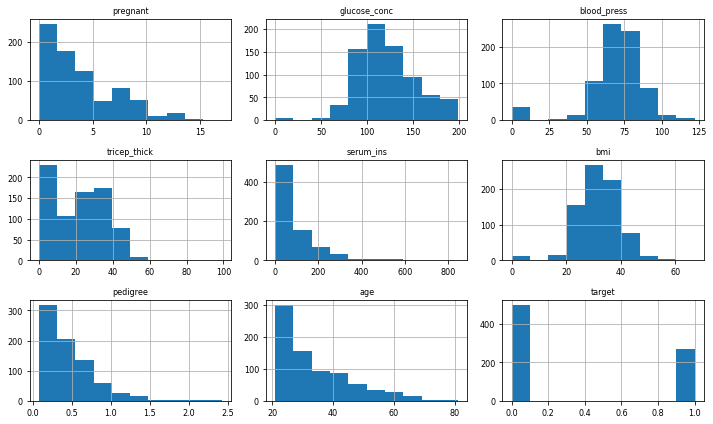

In [5]:
# histograms of the variables
fig = df_diab.hist(xlabelsize=8, ylabelsize=8,figsize=(10,6))
[x.title.set_size(8) for x in fig.ravel()]

# show the plot
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (MinMaxScaler, StandardScaler, MaxAbsScaler,
                                   RobustScaler, Normalizer)
from sklearn.pipeline import Pipeline, make_pipeline

In [7]:
estimators = [('standardized', StandardScaler()),
              ('model', KNeighborsClassifier())]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('standardized', StandardScaler()),
                ('model', KNeighborsClassifier())])

<ins>Accessing the `named_steps` attribute<ins>

In [8]:
pipe.named_steps

{'standardized': StandardScaler(), 'model': KNeighborsClassifier()}

In [9]:
pipe.named_steps['standardized']

StandardScaler()

In [10]:
pipe.named_steps.model

KNeighborsClassifier()

In [11]:
pipe['standardized']

StandardScaler()

<ins>Accessing the `steps` attribute<ins>

In [12]:
pipe.steps

[('standardized', StandardScaler()), ('model', KNeighborsClassifier())]

In [13]:
pipe.steps[0]

('standardized', StandardScaler())

In [14]:
pipe.steps[1][1]

KNeighborsClassifier()

In [15]:
pipe[0]

StandardScaler()

In [16]:
pipe.named_steps.model == pipe.steps[1][1]

True

<ins>Spot check different scaling methods<ins>

In [17]:
# define and configure the model
model = KNeighborsClassifier()

pipe_dict = {'original': Pipeline(steps=[('m', model)]),
             'centered': Pipeline(steps=[('cen', StandardScaler(with_std=False)),
                                         ('m', model)]),
             'MinMax': Pipeline(steps=[('minmax', MinMaxScaler()), ('m', model)]),
             'MaxAbs': Pipeline(steps=[('maxabs', MaxAbsScaler()), ('m', model)]),
             'normalized': Pipeline(steps=[('norm', Normalizer()), ('m', model)]),
             'standardized': Pipeline(steps=[('std', StandardScaler()), ('m', model)])}

for i, pipe in pipe_dict.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print(f'Accuracy with {i:^12} data: {np.mean(scores):.3f} +/-({np.std(scores):.3f})')

Accuracy with   original   data: 0.717 +/-(0.040)
Accuracy with   centered   data: 0.717 +/-(0.040)
Accuracy with    MinMax    data: 0.739 +/-(0.053)
Accuracy with    MaxAbs    data: 0.738 +/-(0.048)
Accuracy with  normalized  data: 0.690 +/-(0.043)
Accuracy with standardized data: 0.741 +/-(0.050)


<a id="binary"></a>
<h5 style="text-decoration:underline">Data Binarization</h5>

$$f(x)={0,1}$$

Feature binarization is the process of thresholding numerical features to get boolean values. All values above the threshold are marked 1 and all equal to or below are marked as 0. 
- This can be useful for downstream probabilistic estimators that make assumptions that the input data is distributed according to a multi-variate Bernoulli distribution.
- It can be useful when you have probabilities that you want to make crisp values. 
- It is also useful when feature engineering and you want to add new features that indicate something meaningful.
- It is also common among the text processing community to use binary feature values (probably to simplify the probabilistic reasoning) even if normalized counts (a.k.a. term frequencies) or TF-IDF valued features often perform slightly better in practice.

```python
# Using Sklearn
---------------
from sklearn.preprocessing import Binarizer

X_bin = Binarizer(threshold=0.0).fit_transform(X)

# Using Numpy
-------------
np.digitize(x, bins, right=False)
```

<a id="out"></a>
<h1 align="center">HOW TO SCALE DATA WITH OUTLIERS</h1>

Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). **Standardization can become skewed or biased if the input variable contains outlier values.** To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as **robust scaling**.

<a id="robust"></a>
<h2><ins>Robust Scaling Data</ins></h2>

Sometimes an input variable may have outlier values. These are values on the edge of the distribution that may have a low probability of occurrence, yet are overrepresented for some reason. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers. 

One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable. This is called **robust standardization** or **robust data scaling**. This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.
$$X_R=\frac{X-median}{IQR}=\frac{X-median}{p_{75}-p_{25}}$$
**The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.**
>Unlike the previous scalers, the centering and scaling statistics of `RobustScaler` is based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers.

<a id="scale"></a>
<h2><ins>Robust Scaler Transforms</ins></h2>

**Transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).** The robust scaler transform is available in the scikit-learn Python machine learning library via the `RobustScaler` class. The `with_centering` argument controls whether the value is centered to zero (median is subtracted) and defaults to True. The `with_scaling` argument controls whether the value is scaled to the IQR (standard deviation set to one) or not and defaults to True. Interestingly, the definition of the scaling range can be specified via the `quantile_range` argument. It takes a tuple of two integers between 0 and 100 and defaults to the percentile values of the IQR, specifically (25, 75). Changing this will change the definition of outliers and the scope of the scaling. 
>**Note that RobustScaler does not scale the data into a predetermined interval like MinMaxScaler. The range for each feature after `RobustScaler` is applied is larger than it was for MinMaxScaler. Use `RobustScaler` if you want to reduce the effects of outliers, relative to MinMaxScaler.** 

The histogram plots shown previously confirm the differing scale for each input variable and show that the variables have differing scales. Importantly, we can see some of the distributions show the presence of outliers. The dataset provides a good candidate for using a robust scaler transform to standardize the data in the presence of differing input variable scales and outliers.

<a id="iqr"></a>
<h2><ins>IQR Robust Scaler Transform</ins></h2>

We can apply the robust scaler to the diabetes dataset directly. We will use the default configuration and scale values to the IQR. First, a RobustScaler instance is defined with default hyperparameters. Once defined, we can call the fit_transform() function and pass it to our dataset to create a robust scale transformed version of our dataset.

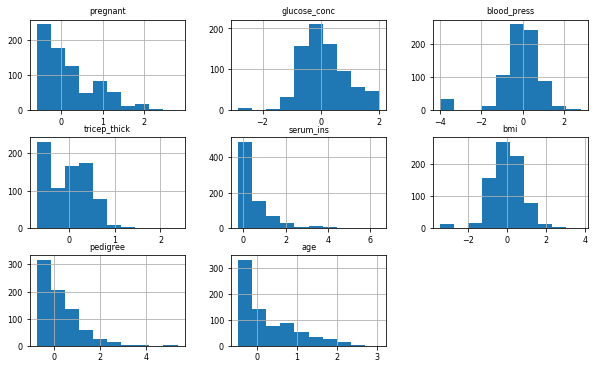

In [18]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(X)
df_robust = pd.DataFrame(data, columns = X.columns)
fig = df_robust.hist(xlabelsize=8, ylabelsize=8, figsize=(10,6))
[x.title.set_size(8) for x in fig.ravel()]
# show the plot
plt.show()

Histogram plots of the transformed variables show that the distributions don’t look much
different from their original distributions. We can see that the center of mass for each distribution is now close to zero.

In [19]:
data_dict = {'original':X,
             'minmax':pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns),
             'standard':pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns),
             'robust':pd.DataFrame(RobustScaler().fit_transform(X),columns=X.columns)}

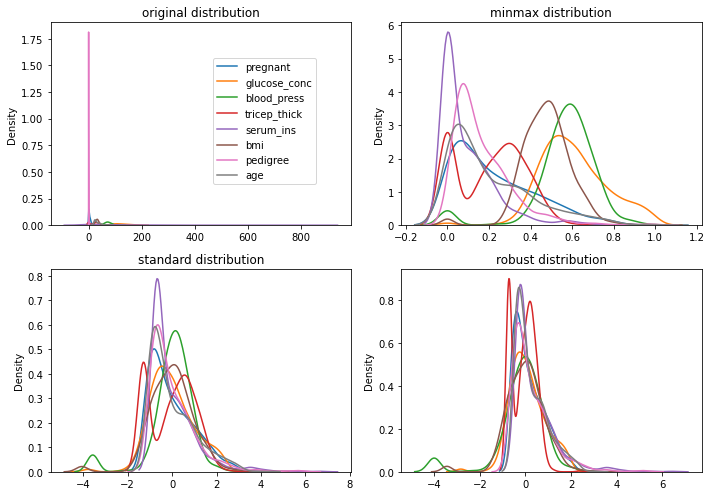

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

for ax, (name, df) in zip(axes.ravel(), data_dict.items()):
    
    for i in df.columns:
        sns.kdeplot(df[i], ax=ax, label=i)
    ax.set_title(f'{name} distribution')
    ax.set_xlabel('')
#     ax.legend()
    if name=='original':
        ax.legend(bbox_to_anchor=(0.4, 0.35, 0.5, 0.5))
        
# plt.legend(bbox_to_anchor=(0, 0.5, 0.5, 0.5))
plt.tight_layout()

In [21]:
# define and configure the model
model = KNeighborsClassifier()

pipe_dict = {'original': Pipeline(steps=[('m', model)]),
             'robust': Pipeline(steps=[('rob', RobustScaler()), ('m', model)])}

for i, pipe in pipe_dict.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    print(f'Accuracy with {i:^10} data: {np.mean(scores):.3f} +/-({np.std(scores):.3f})')

Accuracy with  original  data: 0.717 +/-(0.040)
Accuracy with   robust   data: 0.734 +/-(0.044)


<a id="explore"></a>
<h2><ins>Explore Robust Scaler Range</ins></h2>

The range used to scale each variable is chosen by default as the IQR is bounded by the 25th and 75th percentiles. This is specified by the quantile_range argument as a tuple. Other values can be specified and might improve the performance of the model, such as a wider range, allowing fewer values to be considered outliers, or a more narrow range, allowing more values to be considered outliers.

Range=(1,99): 0.734 +/-(0.054)
Range=(5,95): 0.736 +/-(0.051)
Range=(10,90): 0.739 +/-(0.047)
Range=(15,85): 0.740 +/-(0.045)
Range=(20,80): 0.734 +/-(0.050)
Range=(25,75): 0.734 +/-(0.044)
Range=(30,70): 0.735 +/-(0.042)


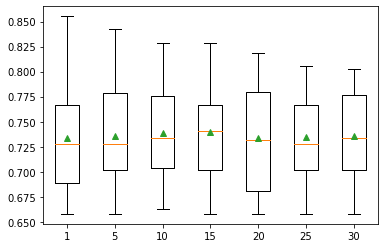

In [22]:
models = dict()
for value in [1, 5, 10, 15, 20, 25, 30]:
    # define the pipeline
    robust = RobustScaler(quantile_range=(value, 100-value))
    model = KNeighborsClassifier()
    models[str(value)] = Pipeline(steps=[('r', robust), ('m', model)])
    
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f'Range=({name},{100-int(name)}): {np.mean(scores):.3f} +/-({np.std(scores):.3f})')

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Interestingly, we can see that there are a couple of ranges that perform better than the default of 25-75. Box and whisker plots are created to summarize the classification accuracy scores for each IQR range. We can see a subtle difference in the distribution and mean accuracy

<a id="categ"></a>
<h1 align="center">HOW TO ENCODE CATEGORICAL DATA</h1>

Categorical variables are variables that classify observations into groups. They have a limited number of different values, called levels. Regression analysis requires numerical variables. So, when a researcher wishes to include a categorical variable in a regression model, supplementary steps are required to make the results interpretable. In these steps, the categorical variables are recoded into a set of separate binary variables. This recoding is called “dummy coding”.

Machine learning models require all input and output variables be numeric. This means that if the data contains categorical data, it must be encoded into numbers before fitting and evaluating a model. 

<a id="var"></a>
<h2><ins>Nominal and Ordinal Variables</ins></h2>

**Numerical** data involves features that are only composed of numbers, such as integers or floating-point values. **Categorical** data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set. 

- **Nominal Variable** - Variable comprises a finite set of discrete values with no rank-order relationship between values.<br><br>
- **Ordinal Variable** - Some categories may have a natural relationship to each other, such as a natural ordering (i.e. 1st,2nd,3rd). This type of categorical variable is called an ordinal variable because the values can be ordered or ranked. In this situation, the variable comprises a finite set of discrete values with a ranked ordering between values.<br><br>
- A numerical variable can be converted to an ordinal variable by dividing the range of the numerical variable into bins and assigning values to each bin. This is called **discretization**.

Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation). Many machine learning algorithms,however, cannot operate on label data directly. They require all input variables and output variables to be numeric. In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves.<br>
$\;\;\;\;\;\;$Some implementations of machine learning algorithms require all data to be numerical. For example, scikit-learn has this requirement. This means that categorical data must be converted to a numerical form. If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.


<a id="encode"></a>
<h2><ins>Encoding Categorical Data</ins></h2>

There are three common approaches for converting ordinal and categorical variables to numerical values. 
- Ordinal Encoding
- One Hot Encoding
- Dummy Variable Encoding

<a id="ord"></a>
<h5 style="text-decoration:underline">Ordinal Encoding</h5>

In ordinal encoding, each unique category value is assigned an integer value. For example, red is 1, green is 2, and blue is 3. This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used. For some variables, an ordinal encoding may be enough. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. 

An integer ordinal encoding is a natural encoding for ordinal variables. For categorical variables, it imposes an ordinal relationship where no such relationship may exist. This can cause problems and a one hot encoding may be used instead. This ordinal encoding transform is available in the scikit-learn Python machine learning library via the `OrdinalEncoder` class. 
- By default, it will assign integers to labels in the order that is observed in the data. For strings, this means the labels are sorted alphabetically. If a specific order is desired, it can be specified via the `categories` argument as a list with the rank order of all expected labels.

>**If a categorical target variable needs to be encoded for a classification predictive modeling problem, then the `LabelEncoder` class can be used. It does the same thing as the `OrdinalEncoder`, although it expects a one-dimensional input for the single target variable.**

<a id="hot"></a>
<h5 style="text-decoration:underline">One Hot Encoding</h5>

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough or even misleading to the model. Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories). In this case, a one hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

One hot encoding transform is available in the scikit-learn Python machine learning library via the `OneHotEncoder` class. We can demonstrate the usage of the OneHotEncoder on the color categories. First the categories are sorted, in this case alphabetically because they are strings, then binary variables are created for each category in turn.

If you know all of the labels to be expected in the data, they can be specified via the `categories` argument as a list. The encoder is fit on the training dataset, which likely contains at least one example of all expected labels for each categorical variable if you do not specify the list of labels. If new data contains categories not seen in the training dataset, the `handle_unknown` argument can be set to `ignore` to not raise an error, which will result in a zero value for each label.

<a id="dummy"></a>
<h5 style="text-decoration:underline">Dummy Variable Encoding</h5>

The one hot encoding creates one binary variable for each category. The problem is that this representation includes redundancy. For example, if we know that [1,0,0] represents blue and [0,1,0] represents green we don’t need another binary variable to represent red, instead we could use 0 values alone, e.g. [0,0]. This is called a **dummy variable encoding**, and always represents $C$ categories with $C−1$ binary variables.

In addition to being slightly less redundant, a dummy variable representation is required for some models. For example, in the case of a linear regression model (and other regression models that have a bias (intercept) term), a one hot encoding will cause the matrix of input data to become singular, meaning it cannot be inverted and the linear regression coefficients cannot be calculated using linear algebra. For these types of models a dummy variable encoding must be used instead.
>There are occasions when a complete set of dummy variables is useful. For
example, the splits in a tree-based model are more interpretable when the dummy
variables encode all the information for that predictor. It is recommended to use the full set of dummy variables when working with tree-based models.

**We can use the `OneHotEncoder` class to implement a dummy encoding as well as a one hot encoding.** The `drop` argument can be set to indicate which category will become the one that is assigned all zero values, called the *baseline*. We can set this to 'first' so that the first category is used. When the labels are sorted alphabetically, the blue label will be the first and will become the baseline.

<a id="bre"></a>
<h2><ins>Breast Cancer Dataset Example</ins></h2>

This dataset classifies breast cancer patient data as either a recurrence or no recurrence of cancer. There are 286 examples and nine input variables. It is a binary classification problem. 

In [23]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [24]:
df_bc = pd.read_csv('./datasets/Data Transforms/breast_cancer.csv',header=None)

# confirms that all features have dtype = 'object'
# df_bc.info()

# checks for missing values
# df_bc.isna().sum()

# replace missing values from NaN to 'nan'
# df_bc[[4,7]] = df_bc[[4,7]].fillna("'missing'")
# df_bc.fillna(np.nan)
df_bc.isna().sum()
# df_bc.head()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64

In [25]:
# separate into input and output columns
X = df_bc.drop(columns=[9]).astype(str)
y = df_bc[9].astype(str)

# summarize
print('Input', X.shape)
print('Output', y.shape)

Input (286, 9)
Output (286,)


In [26]:
X[4].unique()

array(["'yes'", "'no'", 'nan'], dtype=object)

<a id="tran"></a>
<h5 style="text-decoration:underline">OrdinalEncoder Transform</h5>

An ordinal encoding involves mapping each unique label to an integer value. This type of encoding is really only appropriate if there is a known relationship between the categories. This relationship does exist for some of the variables in our dataset, and ideally, this should be harnessed when preparing the data. In this case, we will ignore any possible existing ordinal relationship and assume all variables are categorical. It can still be helpful to use an ordinal encoding, at least as a point of reference with other encoding schemes. We can use the OrdinalEncoder from scikit-learn to encode each variable to integers. This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known. Once defined, we can call the `fit_transform()` function and pass it to our dataset to create a ordinal transformed version of our dataset.

In [27]:
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X_ord = ordinal_encoder.fit(X)
X_oe = X_ord.transform(X)

# shows the categories for each feature 
X_ord.categories_

[array(["'20-29'", "'30-39'", "'40-49'", "'50-59'", "'60-69'", "'70-79'"],
       dtype=object),
 array(["'ge40'", "'lt40'", "'premeno'"], dtype=object),
 array(["'0-4'", "'10-14'", "'15-19'", "'20-24'", "'25-29'", "'30-34'",
        "'35-39'", "'40-44'", "'45-49'", "'5-9'", "'50-54'"], dtype=object),
 array(["'0-2'", "'12-14'", "'15-17'", "'24-26'", "'3-5'", "'6-8'",
        "'9-11'"], dtype=object),
 array(["'no'", "'yes'", 'nan'], dtype=object),
 array(["'1'", "'2'", "'3'"], dtype=object),
 array(["'left'", "'right'"], dtype=object),
 array(["'central'", "'left_low'", "'left_up'", "'right_low'",
        "'right_up'", 'nan'], dtype=object),
 array(["'no'", "'yes'"], dtype=object)]

In [28]:
# useless function to help identify the values assigned to each category
# from pprint import pprint

# df_bc[[4,7]] = df_bc[[4,7]].fillna("'missing'")

# full_dict = dict()

# for i, col_name in zip(X_ord.categories_, [f'col_{i}' for i in df_bc.columns]):
#     categories = [val.strip("'") for val in list(i)]
#     length = len(categories)
  
#     enc_dict = dict()
#     enc_dict[col_name] = dict(zip(categories, range(length)))
    
#     full_dict.update(enc_dict)
#     print(enc_dict)


# pprint(full_dict)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score

In [30]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=1)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


<a id="one"></a>
<h5 style="text-decoration:underline">OneHotEncoder Transform</h5>

A one hot encoding is appropriate for categorical data where no relationship exists between categories. The scikit-learn library provides the `OneHotEncoder` class to automatically one hot encode one or more variables. By default the OneHotEncoder will output data with a sparse representation, which is efficient given that most values are 0 in the encoded representation. Once defined, we can call the `fit_transform()` function and pass it to our dataset to create a quantile transformed version of our dataset.

In [31]:
X.head()

,0,1,2,3,4,5,6,7,8
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no'


In [32]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X_one = onehot_encoder.fit_transform(X)

print('Original Input', X.shape)
print('One_Hot_Encoded Input', X_one.shape)

Original Input (286, 9)
One_Hot_Encoded Input (286, 43)


Running the example transforms the dataset and reports the shape of the resulting dataset. We would expect the number of rows to remain the same, but the number of columns to dramatically increase. As expected, in this case, we can see that the number of variables has leaped up from 9 to 43 and all values are now binary values 0 or 1.

In [33]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(sparse=True)
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


<a id="dum"></a>
<h5 style="text-decoration:underline">Dummay Variable Transform</h5>

In [34]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)

# Converting splits into dummies while keeping train & test consistent
all_data = pd.concat((X_train,X_test))

for column in all_data.select_dtypes(include=[np.object]).columns:
    
    cat_dtype_train = pd.api.types.CategoricalDtype(categories=all_data[column].unique())
    cat_dtype_test = pd.api.types.CategoricalDtype(categories=all_data[column].unique())
    
    X_train[column] = X_train[column].astype(cat_dtype_train)
    X_test[column] = X_test[column].astype(cat_dtype_test)
    
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
score = r2_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print(f'R^2: {score:.2f}')

Accuracy: 70.53
R^2: -0.30


<a id="col"></a>
<h5 style="text-decoration:underline">ColumnTansformer</h5>

In [35]:
# separate into input and output columns
X = df_bc.dropna().drop(columns=[9]).astype(str)
y = df_bc.dropna()[9].astype(str)

# X.shape, y.shape

oe_df = X[[0,1,2,3,5]]
ohe_df = X[[4,6,7,8]]


oe_df = pd.DataFrame(OrdinalEncoder().fit_transform(oe_df),
                     columns=range(5))

ohe_df = pd.DataFrame(OneHotEncoder(sparse=False, drop='first').fit_transform(ohe_df),
                     columns=range(5,12))

full_X = pd.concat([oe_df,ohe_df],axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(full_X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.30


In [36]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('ordinal',OrdinalEncoder(), [0,1,2,3,5]),
                                    ('onehot',OneHotEncoder(drop='first'),[4,6,7,8])],
                       remainder='passthrough')
X = ct.fit_transform(X)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression()

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.30


<a id="quest"></a>
<h2><ins>Common Questions</ins></h2>

**What if I have a mixture of numeric and categorical data?** - Or, what if I have a mixture of categorical and ordinal data? You will need to prepare or encode each variable (column) in your dataset separately, then concatenate all of the prepared variables back together into a single array for fitting or evaluating the model. Alternately, you can use the `ColumnTransformer` to conditionally apply different data transforms to different input variables.

<a id="gaus"></a>
<h1 align="center">HOW TO MAKE DISTRIBUTIONS MORE GAUSSIAN</h1>

Machine learning algorithms like Linear Regression and Gaussian Naive Bayes assume the numerical variables have a Gaussian probability distribution. Data may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew) or a totally different distribution (e.g. exponential). As such, better performance may be achieved on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more Gaussian distribution.
> Power transforms like the **Box-Cox transform** and the **Yeo-Johnson transform** provide an automatic way of performing these transforms on data and are provided in the scikit-learn Python machine learning library.

The Gaussian is a common distribution with the familiar bell shape. It is so common that it is often referred to as the normal distribution. Some algorithms like linear regression and logistic regression explicitly assume the real-valued variables have a Gaussian distribution. Other nonlinear algorithms may not have this assumption, yet often perform better when variables have a Gaussian distribution. This applies both to real-valued input variables in the case of classification and regression tasks, and real-valued target variables in the case of regression tasks. 

Some input variables may have a highly skewed or non-standaard distribution, such as an exponential distribution where the most common observations are bunched together. Some input variables may have outliers that cause the distribution to be highly spread. These concerns and others, like non-standard distributions and multi-modal distributions, can make a dataset challenging to model with a range of machine learning models. As such, it is often desirable to transform each input variable to have a standard probability distribution, such as a *Gaussian (normal) distribution* or a *uniform distribution*.

There are data preparation techniques that can be used to transform each variable to make the distribution Gaussian, or if not Gaussian, then more Gaussian like. These transforms are most effective when the data distribution is nearly-Gaussian to begin with and is afflicted with a skew or outliers. Another common reason for transformations is to remove distributional skewness.

<a id="power"></a>
<h2><ins>Power Transforms</ins></h2>

**Power transforms refer to a class of techniques that use a power function (like a logarithm or exponent) to make the probability distribution of a variable Gaussian or more Gaussian like.** This is often described as removing (or minimizing) a skew in the distribution, although more generally is described as stabilizing the variance of the distribution.
- We can apply a power transform directly by calculating the log, square root or inverse of the variable, although this may or may not be the best power transform for a given variable.

Instead, we can use a generalized version of the transform that finds a parameter (lambda or $\lambda$) that best transforms a variable to a Gaussian probability distribution. There are two popular approaches for such automatic power transforms: **Box-Cox Transform**, **Yeo-Johnson Transform**.

These are some common values for lambda:
- $\lambda=-1.0$ is a reciprocal transform.
- $\lambda=-0.5$ is a reciprocal square root transform.
- $\lambda=0.0$ is a log transform.
- $\lambda=0.5$ is a square root transform.
- $\lambda=1.0$ is no transform.

The optimal value for this hyperparameter used in the transform for each variable can be stored and reused to transform new data in an identical manner, such as a test dataset or new data in the future. These power transforms are available in the scikit learn Python machine learning library via the `PowerTransformer` class. The class takes an argument named `method` that can be set to *'yeo-johnson'* or *'box-cox'* for the preferred method. It will also standardize the data automatically after the transform, meaning each variable will have a zero mean and unit variance. This can be turned off by setting the `standardize` argument to *'False'*.


<a id="sonar"></a>
<h5 style="text-decoration:underline">Sonar Dataset</h5>

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold crossvalidation. The dataset describes sonar returns of rocks or simulated mines.

In [37]:
# load dataset
df_son = pd.read_csv('./datasets/Data Transforms/sonar.csv', header=None)

# summarize the shape of the dataset
print(df_son.shape)

# summarize each variable
df_son.describe()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [38]:
# Baseline accuracy score
df_son[60].value_counts(normalize=True)

M    0.533654
R    0.466346
Name: 60, dtype: float64

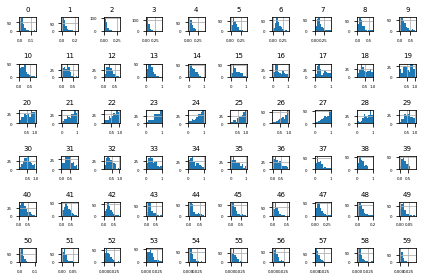

In [39]:
# histograms of the variables
fig = df_son.hist(xlabelsize=4, ylabelsize=4,layout=(6,10))
[x.title.set_size(7) for x in fig.ravel()]

plt.tight_layout()
plt.show()

The descriptive statistics of the input variables shows that values are numeric and range approximately from 0 to 1. From the histogram, we can see that many variables have a skewed distribution. The dataset provides a good candidate for using a power transform to make the variables more Gaussian.

Next, we will fit and evaluate a machine learning model on the raw dataset using k-nearest neighbors algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation.

In [40]:
X = df_son.drop(columns=[60])
y = df_son[60]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y_le = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.797 (0.073)


The model achieved a mean classification accuracy of about 79.7%, showing that it has skill (better than the baseline of 53.4%) and is in the ball-park of good performance (the best being 88%).

<a id="box"></a>
<h5 style="text-decoration:underline">Box-Cox Transform</h5>

The **Box-Cox transform** is named for the two authors of the method. It is **a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported.**

In [41]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')

try:
    # NOTE: we expect this to cause an error.
    X_trans = pt.fit_transform(X)
except ValueError:
    print('This does not work')

This does not work


As expected, we cannot use the transform on the raw data because it is not strictly positive. **One way to solve this problem is to use a `MixMaxScaler` transform first to scale the data to positive values, then apply the transform.** We can use a Pipeline object to apply both transforms in sequence.

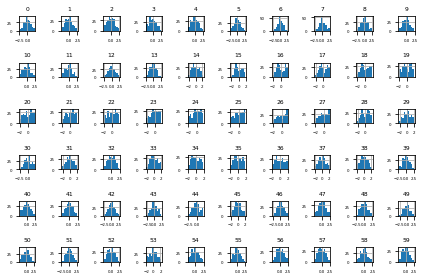

In [43]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_trans = pipeline.fit_transform(X)

# convert the array back to a dataframe
df = pd.DataFrame(data_trans)

# histograms of the variables
fig = df.hist(xlabelsize=4, ylabelsize=4,layout=(6,10))
[x.title.set_size(6) for x in fig.ravel()]

plt.tight_layout()
plt.show()

We can see that the shape of the histograms for each variable looks more Gaussian than the raw data.

Next, let’s evaluate the same KNN model, but in this case on a Box-Cox transform of the scaled dataset.

In [44]:
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy',
                           cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.811 (0.085)


The Box-Cox transform results in a lift in performance from 79.7% accuracy without the transform to about 81.1% with the transform.

<a id="yeo"></a>
<h5 style="text-decoration:underline">Yeo-Johnson Transform</h5>

The Yeo-Johnson transform is also named for the authors. **Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. It supports zero values and negative values.** This means we can apply it to the sonar dataset without scaling it first. 

In [45]:
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy',
                           cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.808 (0.082)


The Yeo-Johnson transform results in a lift in performance from 79.7% accuracy without the transform to about 80.8% with the transform, but is slightly less than the Box-Cox transform that achieved 81.1%.

**Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform.** We can explore this by adding a `StandardScaler` as a first step in the pipeline.

In [46]:
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s',scaler),('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy',
                           cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.816 (0.077)


Standardizing the data prior to the Yeo Johnson transform resulted in a small lift in performance from 80.8% to 81.6%, as well as having a small lift over the results for the Box-Cox transform.

<a id="change"></a>
<h1 align="center">HOW TO CHANGE NUMERICAL DISTRIBUTIONS</h1>

Numerical input variables may have a highly skewed or non-standard distribution. This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more. Many machine learning algorithms prefer or perform better when numerical input variables and even output variables in the case of regression have a standard probability distribution, such as a Gaussian (normal) or a uniform distribution. The **quantile transform** provides an automatic way to transform a numeric input variable to have a different data distribution, which in turn, can be used as input to a predictive model.

`RobustScaler` and `QuantileTransformer` are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to `RobustScaler`, `QuantileTransformer` will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.

<a id="quant"></a>
<h2><ins>Quantile Transforms</ins></h2>

A quantile transform will map a variable’s probability distribution to another probability distribution. Recall that a quantile function, also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and returns the value at or below a given probability.

The quantile function ranks or smooths out the relationship between observations and can be mapped onto other distributions, such as the uniform or normal distribution. The transformation can be applied to each numeric input variable in the training dataset and then provided as input to a machine learning model to learn a predictive modeling task. This quantile transform is available in the scikit-learn Python machine learning library via the `QuantileTransformer` class. The class has an `output_distribution` argument that can be set to *'uniform'* or *'normal'*. It also provides a `n_quantiles` that determines the resolution of the mapping or ranking of the observations in the dataset. This must be set to a value less than the number of observations in the dataset and defaults to 1,000.

<a id="nqt"></a>
<h5 style="text-decoration:underline">Normal Quantile Transform</h5>

We can apply the Quantile transform using the `QuantileTransformer` class and set the output_distribution argument to 'normal'. We must also set the n_quantiles argument to a value less than the number of observations in the training dataset.

In [47]:
from sklearn.preprocessing import QuantileTransformer

In [48]:
# define the pipeline
transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', transformer), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.817 (0.087)


<a id="uqt"></a>
<h5 style="text-decoration:underline">Uniform Quantile Transform</h5>

Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution. This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare. We can apply the transform by defining a `QuantileTransformer` class and setting the `output_distribution` argument to 'uniform' (the default).

In [49]:
# define the pipeline
transformer = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', transformer), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.845 (0.074)


<a id="select"></a>
<h5 style="text-decoration:underline">Select Number of Quantiles</h5>

We chose the number of quantiles = 100 as an arbitrary number. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting performance of the model. The example below performs this experiment and plots the mean accuracy for different `n_quantiles` values from 1 to 99.

>1 0.534 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

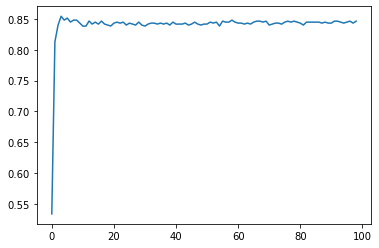

In [50]:
models = dict()
for i in range(1,100):
    # define the pipeline
    trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    
results = list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(np.mean(scores))
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.plot(results)
plt.show()

A line plot is created showing the number of quantiles used in the transform versus the classification accuracy of the resulting model.There is a bump with values less than 10 and drop and flat performance after that. The results highlight that there is likely some benefit in exploring different distributions and number of quantiles to see if better performance can be achieved.

<a id="cat"></a>
<h1 align="center">HOW TO TRANSFORM NUMERICAL TO CATEGORICAL DATA</h1>

The **discretization transform** (which maps numerical values to discrete categories) provides an automatic way to change a numeric input variable to have a different data distribution, which in turn can be used as input to a predictive model.
- Many machine learning algorithms prefer or perform better when numerical features with non-standard probability distributions are made discrete.
- Some machine learning algorithms may prefer or require categorical or ordinal input variables, such as some decision tree and rule-based algorithms. 
- Some classification and clustering algorithms deal with nominal attributes only and cannot handle ones measured on a numeric scale.

Further, the performance of many machine learning algorithms degrades for variables that have non-standard probability distributions. This applies both to real-valued input variables in the case of classification and regression tasks, and real-valued target variables in the case of regression tasks.

One approach is to use a transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship. This is called a binning or a discretization transform and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete.

<a id="disc"></a>
<h2><ins>Discretization Transforms</ins></h2>

A **discretization transform** will map numerical variables onto discrete values (i.e., categories). 

Values for the variable are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved. The use of bins is often referred to as binning or k-bins, where k refers to the number of groups to which a numeric variable is mapped. The mapping provides a high-order ranking of values that can smooth out the relationships between observations. The transformation can be applied to each numeric input variable in the training dataset and then provided as input to a machine learning model to learn a predictive modeling task.

Different methods for grouping the values into $k$ discrete bins can be used. Some common techniques include:
- **Uniform:** Each bin has the same width in the span of possible values for the variable.
- **Quantile:** Each bin has the same number of values, split based on percentiles.
- **Clustered:** Clusters are identified and examples are assigned to each group.

The discretization transform is available in the scikit-learn Python machine learning library via the **`KBinsDiscretizer`** class. The `strategy` argument controls the manner in which the input variable is divided, as either *'uniform'*, *'quantile'*, or *'kmeans'*. The `n_bins` argument controls the number of bins that will be created and must be set based on the choice of strategy, e.g. 'uniform' is flexible, 'quantile' must have a n_bins less than the number of observations or sensible percentiles, and 'kmeans' must use a value for the number of clusters that can be reasonably found. The `encode` argument controls whether the transform will map each value to an integer value by setting 'ordinal' or a one hot encoding 'onehot'. 
- An ordinal encoding is almost always preferred, although a one hot encoding may allow a model to learn non-ordinal relationships between the groups, such as in the case of k-means clustering strategy.

<a id="uni"></a>
<h5 style="text-decoration:underline">Uniform Discretization Transform</h5>

A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels.

In [51]:
from sklearn.preprocessing import KBinsDiscretizer

In [52]:
# define the pipeline
transform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', transform), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.829 (0.079)


The uniform discretization transform results in a lift in performance from 79.7% accuracy without the transform to about 82.7% with the transform.

<a id="kmean"></a>
<h5 style="text-decoration:underline">k-Means Discretization Transform</h5>

A k-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster. Unless the empirical distribution of the variable is complex, the number of clusters is likely to be small, such as 3-to-5.

In [53]:
# define the pipeline
transform = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', transform), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.814 (0.084)


The k-means discretization transform results in a lift in performance from 79.7% accuracy without the transform to about 81.4% with the transform, although slightly less than the uniform distribution.

<a id="qdt"></a>
<h5 style="text-decoration:underline">Quantile Discretization Transform</h5>

A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal. Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10.

In [54]:
# define the pipeline
transform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', transform), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.840 (0.072)


The uniform transform results in a lift in performance from 79.7% accuracy without the transform to about 84.0% with the transform, better than the uniform and k-means strategy.

We chose the number of bins as an arbitrary number; in this case, 10. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting performance of the model. We can experiment and plots the mean accuracy for different n_bins values from two to 10.

>2 0.822 (0.066)
>3 0.869 (0.073)
>4 0.838 (0.078)
>5 0.838 (0.070)
>6 0.836 (0.071)
>7 0.852 (0.072)
>8 0.837 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


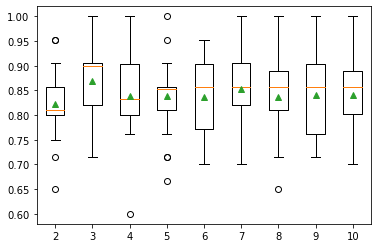

In [55]:
models = dict()
for i in range(2,11):
    # define the pipeline
    transform = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', transform), ('m', model)])
    
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

A $k$ value of 3 achieves an accuracy of 86.9%. We can see a small bump in accuracy at three bins and the scores drop and remain flat for larger values. The results highlight that there is likely some benefit in exploring different numbers of discrete bins for the chosen method to see if better performance can be achieved.

<a id="cluster"></a>
<h2 style="text-decoration:underline">Grouping Observations Using Clustering</h2>

If you know that you have k groups, you can use k-means clustering to group
similar observations and output a new feature containing each observation’s
group membership

```python
from sklearn.cluster import KMeans

# Make k-means clusterer 
clusterer = KMeans(n_clusters=8, init='k-means++', max_iter=300, 
                   n_init=10, tol=0.0001, random_state=None,
                   verbose=0, copy_x=True, algorithm='auto')

# Predict values and assign to new column
df["new_col_name"] = clusterer.predict(X)
```

<a id="derive"></a>
<h1 align="center">HOW TO DERIVE NEW INPUT VARIABLES</h1>

Often, the input features for a predictive modeling task interact in unexpected and often nonlinear ways. These interactions can be identified and modeled by a learning algorithm. 

Another approach is to engineer new features that expose these interactions and see if they improve model performance. These features are called interaction and polynomial features. 
- **Polynomial features** are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target. For example, the effect of age on the probability of having a major medical condition is not constant over time but increases as age increases. We can encode that nonconstant effect in a feature by generating that feature’s higher-order forms. 
- Often we run into situations where the effect of one feature is dependent on another feature. We can encode that relationship by including an **interaction feature** that is the product of the individual features.


Transforms like raising input variables to a power can help to better expose the important relationships between input variables and the target variable, although often at the cost of adding thousands or even millions of additional input variables.


<a id="inter"></a>
<h2><ins>Interaction Terms</ins></h2>

In some situations, there might be an **interaction effect** between some predictors, that is for example, increasing the value of a predictor variable x1 may increase the effectiveness of the predictor x2 in explaining the variation in the outcome variable.

Sometimes interactions could be useful to add to the model, especially when you suspect that two features have a relationship that can provide useful information to your model. To see if an interaction term is significant, we can perform a t-test or F-test and look to see if the p-value of the term is significant. One important note is that **if the interaction term is significant, both lower order X terms must be kept in the model**, even if they are insignificant. This is to preserve the X1 and X2 as two independent variables rather than one new variable.

<a id="poly"></a>
<h2><ins>Polynomial Features</ins></h2>

**Polynomial features** are those features created by raising existing features to an exponent. For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. $X^2$. This process can be repeated for each input variable in the dataset, creating a transformed version of each. *As such, polynomial features are a type of feature engineering*, e.g. the creation of new input features based on the existing features. 
>*The degree of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.*

It is also common to add new variables that represent the **interaction** between **features**, e.g a new column that represents one variable multiplied by another. This too can be repeated for each input variable creating a new interaction variable for each pair of input variables. A squared or cubed version of an input variable will change the probability distribution, separating the small and large values, a separation that is increased with the size of the exponent. This separation can help some machine learning algorithms make better predictions and is common for regression predictive modeling tasks and generally tasks that have numerical input variables. 
>*Typically linear algorithms, such as linear regression and logistic regression, respond well to the use of polynomial input variables.*
>>*Linear regression is linear in the model parameters and adding polynomial terms to the model can be an effective way of allowing the model to identify nonlinear patterns.*


<a id="pft"></a>
<h5 style="text-decoration:underline">Polynomial Feature Transform</h5>

The polynomial features transform is available in the scikit-learn Python machine learning
library via the PolynomialFeatures class. The features created include:
- The bias (the value of 1.0)
- Values raised to a power for each degree (e.g. $x^1$,$x^2$,$x^3$,...)
- Interactions between all pairs of features (e.g. $x^1$x $x^2$, $x^1$x $x^3$,$x^2$x $x^3$,...)

The `degree` argument controls the number of features created and defaults to 2. The `interaction_only` argument means that only the raw values (degree 1) and the interaction (pairs of values multiplied with each other) are included, defaulting to False. The `include_bias` argument defaults to True to include the bias feature.

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# define the pipeline
poly = PolynomialFeatures(degree=3, interaction_only=False,
                          include_bias=False)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', poly), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.800 (0.077)


<a id="degree"></a>
<h5 style="text-decoration:underline"> Effect of Polynomial Degree</h5>

Using a degree of 3 in the previous example sees the number of features increased from 61 (60 input features) for the raw dataset to 39,711 features (39,710 input features).

The degree of the polynomial dramatically increases the number of input features. To get an idea of how much this impacts the number of features, we can perform the transform with a range of different degrees and compare the number of features in the dataset.

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


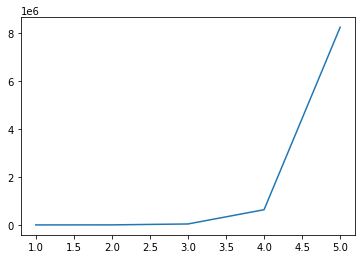

In [58]:
num_features = list()
degrees = [i for i in range(1, 6)]
for d in degrees:
    # create polynomial transform
    poly = PolynomialFeatures(degree=d)
    
    # fit and transform
    data = poly.fit_transform(X)
    
    # record number of features
    num_features.append(data.shape[1])

    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))

# plot degree vs number of features
plt.plot(degrees, num_features)
plt.show()

More features may result in more overfitting, and in turn, worse results. It may be a good idea to treat the degree for the polynomial features transform as a hyperparameter and test different values for your dataset.

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


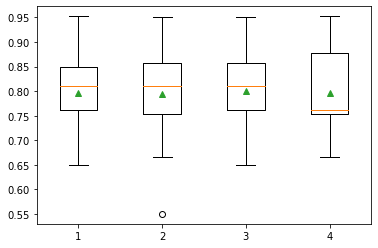

In [59]:
models = dict()
for d in range(1,5):
    # define the pipeline
    poly = PolynomialFeatures(degree=d)
    model = KNeighborsClassifier()
    models[str(d)] = Pipeline(steps=[('t', poly), ('m', model)])
    
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In this case, we can see that performance is generally worse than no transform (degree 1) except for a degree 3.  From the Box and whisker plots we see that performance remains flat, perhaps with the first signs of overfitting with a degree of 4.

It might be interesting to explore scaling the data before or after performing the transform to see how it impacts model performance.

>1 0.810 (0.080)
>2 0.811 (0.073)
>3 0.806 (0.074)


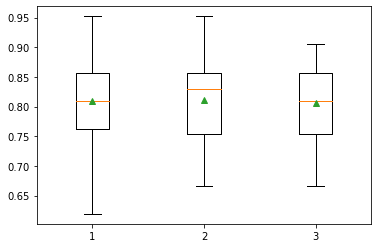

In [60]:
models = dict()
for d in range(1,4):
    # define the pipeline
    scaler = StandardScaler()
    poly = PolynomialFeatures(degree=d)
    model = KNeighborsClassifier()
    models[str(d)] = Pipeline(steps=[('t', poly),('sc', scaler) , ('m', model)])
    
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y_le, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

<a id="func"></a>
<h2><ins>Transforming Features with FunctionTransformer</ins></h2>

We can make a custom transformation to one or more features with Scikit-Learns' `FunctionTransformer` method. This is similar to numpy's `vectorize` method and pandas `apply` method.

It is common to want to make some custom transformations to one or more features. For example, we might want to create a feature that is the natural log of a feature. We can do this by creating a function and then mapping it to features using either scikit-learn’s `FunctionTransformer` or pandas’ `apply`.

```python
# Define a simple function
def take_log(x):
    return np.log(x)

Using FunctionTransformer
-------------------------
# Create transformer
log_transformer = FunctionTransformer(take_log)

# Transform feature matrix
log_transformer.transform(df)

Using apply
-----------
df.apply(take_log)
```

<a id="num_cat"></a>
<h1 align="center">HOW TO TRANSFORM NUMERICAL AND CATEGORICAL DATA</h1>

It is now apparent the necessity to prepare raw data using transforms prior to fitting a machine learning model to ensure that we best expose the structure of the predictive modeling problem to the learning algorithms. Applying data transforms like scaling or encoding categorical variables is straightforward when all input variables are the same type. It can be challenging though when we have a dataset with mixed types and want to selectively apply data transforms to some, but not all, input features. This is where scikit-learn's library provides the ColumnTransformer that allows us to selectively apply data transforms to different columns in a dataset.

<a id="chall"></a>
<h2><ins>Challenge of Transforming Different Data Types</ins></h2>

It is important to prepare data prior to modeling. *This may involve replacing missing values, scaling numerical values, and one hot encoding categorical data.* Data transforms can be performed using the scikit-learn library; for example, the `SimpleImputer` class can be used to replace missing values, the `MinMaxScaler` class can be used to scale numerical values, and the `OneHotEncoder` can be used to encode categorical variables. Sequences of different transforms can also be chained together using `Pipelines`.

It is very common to want to perform different data preparation techniques on different columns in the input data. For example, you may want to impute missing numerical values with a median value, then scale the values and impute missing categorical values using the most frequent value and one hot encode the categories. Traditionally, this would require separating the numerical and categorical data and then manually applying the transforms on those groups of features before combining the columns back together in order to fit and evaluate a model. Now, scikit-learn's *`ColumnTransformer`* can perform this operation.

<a id="use"></a>
<h3><ins>How to use the ColumnTransformer</ins></h3>

The **ColumnTransformer** is a class in the scikit-learn Python machine learning library that allows you to selectively apply data preparation transforms. For example, it allows you to apply a specific transform or sequence of transforms to just the numerical columns, and a separate sequence of transforms to just the categorical columns. 
>**To use the ColumnTransformer, you must specify a list of transformers.<br><br>Each transformer is a three-element tuple that defines the name of the transformer, the transform to apply, and the column indices to apply it to.**

For example, to use the ColumnTransformer to apply a OneHotEncoder to columns 0 and 1:
```python
transformer = ColumnTransformer(transformers=
                  [('num',SimpleImputer(strategy='median'), [0, 1]),
                   ('cat', SimpleImputer(strategy='most_frequent'), [2, 3]),
                   ('cat', OneHotEncoder(), [0, 1])],
                    remainder='passthrough')
```
Any columns not specified in the list of transformers are dropped from the dataset by default; this can be changed by setting the `remainder` argument. Setting **remainder='passthrough'** will mean that all columns not specified in the list of transformers will be passed through without transformation, instead of being dropped.

A ColumnTransformer can also be used in a Pipeline to selectively prepare the columns of the dataset before fitting a model on the transformed data. This is the most likely use case as it ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a test dataset via cross-validation or making predictions on new data in the future.
```python
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0, 1])])
pipeline = Pipeline(steps=[('t', transformer), ('m',model)])
```

<a id="abalone"></a>
<h2><ins>Abalone Regression Dataset</ins></h2>

The abalone dataset is a standard machine learning problem that involves predicting the age of an abalone given measurements of an abalone. The dataset has 4,177 examples, 8 input variables, and the target variable is an integer. A naive model can achieve a mean absolute error (MAE) of about 2.363 (std 0.092) by predicting the mean value, evaluated via 10-fold cross-validation. 

In [61]:
# load dataset
df_aba = pd.read_csv('./datasets/Data Transforms/abalone.csv', header=None)
df_aba.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The first column is categorical and the remainder of the columns are numerical. We may want to one hot encode the first column and normalize the remaining numerical columns, and this can be achieved using the ColumnTransformer. We can model this as a regression predictive modeling problem with a support vector machine model (SVR).

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [63]:
# split into inputs and outputs
X = df_aba.drop(8, axis=1)
y = df_aba[8]

# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_cols), ('num', MinMaxScaler(), numerical_cols)]
col_transform = ColumnTransformer(transformers=t)

# define the model
model = SVR(kernel='rbf',gamma='scale',C=100)

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross-validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# convert MAE scores to positive values
scores = np.absolute(scores)

# summarize the model performance
print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 1.465 (0.047)


In this case, we achieve an average MAE of about 1.4, which is better than the baseline score of 2.3.

<a id="reg"></a>
<h1 align="center">HOW TO TRANSFORM THE TARGET VARIABLE</h1>

Data preparation is a big part of applied machine learning. Correctly preparing the training data can mean the difference between mediocre and extraordinary results, even with very simple linear algorithms. Performing data preparation operations, such as scaling, is relatively straightforward for input variables and has been made routine in Python via the Pipeline scikit-learn class. On regression predictive modeling problems where a numerical value must be predicted, it can also be critical to scale and perform other data transformations on the target variable. This can be achieved in Python using the `TransformedTargetRegressor` class.
>For regression problems, it is often desirable to scale or transform both the input and the target variables.

<a id="imbal"></a>
<h2><ins>Handling Imbalanced Classes</ins></h2>

If the target vector contains highly **imbalanced classes**, then there are a few possible solutions. Collect more data. If that isn’t possible, change the metrics used to evaluate your model. If that doesn’t work, consider using a model’s built-in class weight parameters (if available), downsampling, or upsampling. 
- **Many algorithms in scikit-learn offer a parameter to weight classes during training to counteract the effect of their imbalance.** 
- Alternatively, we can downsample the majority class or upsample the minority class. In **downsampling**, we randomly sample without replacement from the majority class (i.e., the class with more observations) to create a new subset of observations equal in size to the minority class. For example, if the minority class has 10 observations, we randomly select 10 observations from the majority class and use those 20 observations as the dataset.
- The other option is to upsample the minority class. In **upsampling**, for every observation in the majority class, we randomly select an observation from the minority class with replacement. The end result is the same number of observations from the minority and majority classes. Upsampling is implemented very similarly to downsampling, just in reverse.

In [64]:
df_diab.head()

,pregnant,glucose_conc,blood_press,tricep_thick,serum_ins,bmi,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df_diab['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

In [66]:
X_diab = df_diab.drop(columns=['target'])
y_diab = df_diab['target']

y_diab.value_counts()

0    500
1    268
Name: target, dtype: int64

In [67]:
# Indicies of each class' observations
i_class0 = np.where(y_diab == 0)[0]
i_class1 = np.where(y_diab == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

print(n_class0)
print(n_class1)

500
268


In [68]:
# For every observation of class 1, randomly sample
# from class 0 without replacement
i_class0_downsampled = np.random.choice(i_class0, size=n_class1,
                                        replace=False)
len(i_class0_downsampled)

268

In [69]:
# Join together class 1's target vector with the
# downsampled class 0's target vector
new_target = np.hstack((y_diab[i_class1], y_diab[i_class0_downsampled]))
new_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
# Join together class 1's feature matrix with the
# downsampled class 0's feature matrix
new_data = np.vstack((X_diab.loc[i_class1,:],
                      X_diab.loc[i_class0_downsampled,:]))
new_data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       ...,
       [  1.   , 112.   ,  80.   , ...,  34.8  ,   0.217,  24.   ],
       [  2.   , 119.   ,   0.   , ...,  19.6  ,   0.832,  72.   ],
       [ 12.   , 100.   ,  84.   , ...,  30.   ,   0.488,  46.   ]])

In [71]:
print(new_target.shape)
print(new_data.shape)

(536,)
(536, 8)


In [72]:
# converting back to a single dataframe.
df_data = pd.DataFrame(new_data, columns=X_diab.columns)
df_target = pd.DataFrame(new_target, columns=['target'])

df = pd.concat([df_data,df_target],axis=1)
df

# might be a good idea to shuffle the data befor split.

,pregnant,glucose_conc,blood_press,tricep_thick,serum_ins,bmi,pedigree,age,target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
2,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
3,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
4,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
531,4.0,141.0,74.0,0.0,0.0,27.6,0.244,40.0,0
532,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47.0,0
533,1.0,112.0,80.0,45.0,132.0,34.8,0.217,24.0,0
534,2.0,119.0,0.0,0.0,0.0,19.6,0.832,72.0,0


**It might be a good idea to shuffle the data before split or shuffle and stratify within the train_test_split.**

In [73]:
df['target'].value_counts()

0    268
1    268
Name: target, dtype: int64

In the real world, imbalanced classes are everywhere. For this reason, handling imbalanced classes is a common activity in machine learning. The best strategy is simply to collect more observations — especially observations from the minority class. However, this is often just not possible, so we have to resort to other options.

A second strategy is to use a model evaluation metric better suited to imbalanced classes. Accuracy is often used as a metric for evaluating the performance of a model, but when imbalanced classes are present accuracy can be ill suited. Some better metrics are confusion matrices, precision, recall, F1 scores, and ROC curves.

A third strategy is to use the class weighing parameters included in implementations of some models. This allows us to have the algorithm adjust for imbalanced classes. Fortunately, many scikit-learn classifiers have a class_weight parameter, making it a good option.

The fourth and fifth strategies are related: downsampling and upsampling. In downsampling we create a random subset of the majority class of equal size to the minority class. In upsampling we repeatedly sample with replacement from the minority class to make it of equal size as the majority class. The decision between using downsampling and upsampling is context-specific, and in general we should try both to see which produces better results.

<a id="target"></a>
<h2><ins>How to Scale Target Variables</ins></h2>

There are two ways that you can scale target variables. 
1. Manually transform the target variable.
2. Automatically transform the target variable.

<a id="manual"></a>
<h5 style="text-decoration:underline">Manual Transform of the Target Variable</h5>

Manually managing the scaling of the target variable involves creating and applying the scaling object to the data manually. It involves the following steps:
1. Create the transform object, e.g. a `MinMaxScaler`.
2. Fit the transform on the training dataset.
3. Apply the transform to the train and test datasets.
4. Invert the transform on any predictions made

For example, if we wanted to normalize a target variable:
```python
# create target scaler object
target_scaler = MinMaxScaler()
target_scaler.fit(train_y)

# transform target variables
train_y = target_scaler.transform(train_y)
test_y = target_scaler.transform(test_y)

# invert transform on predictions
yhat = model.predict(test_X)
yhat = target_scaler.inverse_transform(yhat)
```

This is a pain, as it means you cannot use convenience functions in scikit learn, such as `cross_val_score()`, to quickly evaluate a model. 

<a id="auto"></a>
<h5 style="text-decoration:underline">Automatic Transform of the Target Variable</h5>

An alternate approach is to automatically manage the transform and inverse transform. This can be achieved by using the **`TransformedTargetRegressor`** object that wraps a given model and a scaling object. It will prepare the transform of the target variable using the same training data used to fit the model, then apply that inverse transform on any new data provided when calling fit(), returning predictions in the correct scale.

```python
# define the target transform wrapper
wrapped_model = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())

# use the target transform wrapper
wrapped_model.fit(train_X, train_y)
yhat = wrapped_model.predict(test_X)
```

This is much easier and allows you to use helpful functions like `cross_val_score()` to evaluate a model.

<a id="ttr"></a>
<h3><ins>Using the TransformedTargetRegressor</ins></h3>

The Boston housing dataset is a regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices. A naive regression model that predicts the mean value of the target on this problem can achieve a mean absolute error (MAE) of about 6.659. We will fit a `HuberRegressor` class (**a type of linear regression robust to outliers**) and normalize the input variables using a Pipeline.

In [74]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import RepeatedKFold

In [75]:
# load dataset
df_bos = pd.read_csv('./datasets/Data Transforms/boston_housing.csv', header=None)

# split into inputs and outputs
X = df_bos.drop(columns=[13])
y = df_bos[13]

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()),
                           ('model', HuberRegressor())])

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, 
                                   transformer=MinMaxScaler())

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, 
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert scores to positive
scores = np.absolute(scores)

# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 3.203


In this case, we achieve a MAE of about 3.2, much better than a naive model that achieved about 6.6.

We are not restricted to using scaling objects; for example, we can also explore using other data transforms on the target variable, such as the **`PowerTransformer`**, that can make each variable more-Gaussian-like (using the *Yeo-Johnson transform*) and improve the performance of linear models. By default, the PowerTransformer also performs a standardization of each variable after performing the transform. It can also help to scale the values to the range 0-1 prior to applying a power transform, to avoid problems inverting the transform. We achieve this using the MinMaxScaler and defining a positive range.

In [76]:
# prepare the model with input scaling and power transform
steps = [('scale', MinMaxScaler(feature_range=(1e-5,1))),
        ('power', PowerTransformer()),
        ('model', HuberRegressor())]

pipeline = Pipeline(steps=steps)

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline,
                                   transformer=PowerTransformer())

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, 
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert scores to positive
scores = np.absolute(scores)

# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.972


In this case, we see further improvement to the MAE.

In [77]:
# prepare the model with input scaling and power transform
steps = [('scale', MinMaxScaler(feature_range=(1e-5,1))),
         ('model', HuberRegressor())]

pipeline = Pipeline(steps=steps)

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline,
                                   transformer=PowerTransformer())

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, 
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert scores to positive
scores = np.absolute(scores)

# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.808


In [78]:
# prepare the model with input scaling and target log transform
steps = [('scale', MinMaxScaler(feature_range=(1e-5,1))),
         ('model', HuberRegressor())]

pipeline = Pipeline(steps=steps)

# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline,
                                   func=np.log, inverse_func=np.exp)

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, 
                         scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert scores to positive
scores = np.absolute(scores)

# summarize the result
s_mean = np.mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.747


<a id="text"></a>
<h1 align="center">HOW TO HANDLE TEXT</h1>

Unstructured text data, like the contents of a book or a tweet, is both one of the most interesting sources of features and one of the most complex to handle.

<a id="clean"></a>
<h2><ins>Cleaning Text</ins></h2>

Most basic text cleaning operations should only replace Python’s core string operations, in particular `strip`, `replace`, and `split`.

In [79]:
# Create text
text_data = [" Hybrid-Theory. By Linkin Park ",
             "Binaural. By Pearl Jam           ",
             " Dark Side Of The Moon. By Pink Floyd "]

In [80]:
# Strip whitespaces
strip_whitespace = [string.strip() for string in text_data]
strip_whitespace

['Hybrid-Theory. By Linkin Park',
 'Binaural. By Pearl Jam',
 'Dark Side Of The Moon. By Pink Floyd']

In [81]:
# Remove periods
remove_periods = [string.replace(".", "") for string in strip_whitespace]
remove_periods

['Hybrid-Theory By Linkin Park',
 'Binaural By Pearl Jam',
 'Dark Side Of The Moon By Pink Floyd']

In [82]:
# Create and apply a custom transformation function:

def capitalizer(string: str) -> str:
    return string.upper()

# Apply function
[capitalizer(string) for string in remove_periods]

['HYBRID-THEORY BY LINKIN PARK',
 'BINAURAL BY PEARL JAM',
 'DARK SIDE OF THE MOON BY PINK FLOYD']

In [83]:
import re

regex = r"[a-zA-Z]+"
# regex = r"([a-zA-Z]+)(?:,\s*|)"

# test_str = ("\" Hybrid-Theory. By Linkin Park \",\n"
# 	"             \"Binaural. By Pearl Jam           \",\n"
# 	"             \" Dark Side Of The Moon. By Pink Floyd \"")
# matches = re.finditer(regex, test_str, re.MULTILINE)

matches = re.finditer(regex, str(text_data), re.MULTILINE)
print([i.group() for i in matches])

['Hybrid', 'Theory', 'By', 'Linkin', 'Park', 'Binaural', 'By', 'Pearl', 'Jam', 'Dark', 'Side', 'Of', 'The', 'Moon', 'By', 'Pink', 'Floyd']


In [84]:
# Create function
def replace_letters_with_X(string: str) -> str:
    return re.sub(r"[a-zA-Z]", "X", string)

# Apply function
[replace_letters_with_X(string) for string in remove_periods]

['XXXXXX-XXXXXX XX XXXXXX XXXX',
 'XXXXXXXX XX XXXXX XXX',
 'XXXX XXXX XX XXX XXXX XX XXXX XXXXX']

Most text data will need to be cleaned before it can be used to build features. Most basic text cleaning can be completed using Python’s standard string operations or, by defining a custom cleaning function combining some cleaning tasks and applying that to the text data.

<a id="punc"></a>
<h5><ins>Removing Punctuation</ins></h5>

In [85]:
import unicodedata
import sys

In [86]:
# Create text
text = ['Hi!!!! I. Love. This. Song....',
        '10000% Agree!!!! #LoveIT',
        'Right?!?!']

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

`translate` is a Python method popular due to its blazing speed. In the example above, first we created a dictionary, punctuation, with all punctuation characters according to Unicode as its keys and None as its values. Next we translated all characters in the string that are in punctuation into None, effectively removing them. There are more readable ways to remove punctuation, but this somewhat hacky solution has the advantage of being far faster than alternatives. 

It is important to be conscious of the fact that punctuation contains information (e.g., “Right?” versus “Right!”). Removing punctuation is often a necessary evil to create features; however, if the punctuation is important we should make sure to take that into account.

<a id="parse"></a>
<h2><ins>Parsing and Cleaning HTML</ins></h2>

Despite the strange name, Beautiful Soup is a powerful Python library designed for scraping HTML. Typically, Beautiful Soup is used to scrape live websites, but can just as easily be used to extract text data embedded in HTML.

In [87]:
from bs4 import BeautifulSoup

In [88]:
# Create some HTML code
html = """
<div class='full_name'>
<span style='font-weight:bold'>Masego</span> Azra</div>"
"""

# Parse html
soup = BeautifulSoup(html, "lxml")

# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text.replace('\n','')

'Masego Azra'

<a id="token"></a>
<h2><ins>Tokenizing Text</ins></h2>

**Natural Language Toolkit** for Python (NLTK) has a powerful set of text
manipulation operations, including word tokenizing.

>**Tokenization, especially word tokenization, is a common task after cleaning text data because it is the first step in the process of turning the text into data we will use to construct useful features.**

In [89]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [90]:
# Create text
string = "The science of today is the technology of tomorrow"

# Tokenize words
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [91]:
# Do the same thing using python's split() function
string.split(' ')

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [92]:
text = ['Hi!!!! I. Love. This. Song....',
        '10000% Agree!!!! #LoveIT',
        'Right?!?!']

# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))
# For each string, remove any punctuation characters
cleaned_text = [string.translate(punctuation) for string in text]

[word_tokenize(string) for string in cleaned_text]

[['Hi', 'I', 'Love', 'This', 'Song'], ['10000', 'Agree', 'LoveIT'], ['Right']]

In [93]:
from itertools import chain

list(chain.from_iterable([word_tokenize(string) for string in cleaned_text]))

['Hi', 'I', 'Love', 'This', 'Song', '10000', 'Agree', 'LoveIT', 'Right']

**Note the difference - `chain` alone requires unpacking the list with the `*` operator.**

In [94]:
list(chain(*[word_tokenize(string) for string in cleaned_text]))

['Hi', 'I', 'Love', 'This', 'Song', '10000', 'Agree', 'LoveIT', 'Right']

We can also tokenize into sentences.

In [95]:
# Create text
string = """The science of today is the technology of tomorrow.
Tomorrow is today."""

# Tokenize sentences
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

In [96]:
[sent.replace('.','') for sent in sent_tokenize(string)]

['The science of today is the technology of tomorrow', 'Tomorrow is today']

<a id="stop"></a>
<h2><ins>Removing Stop Words</ins></h2>

Given tokenized text data, we may want to remove extremely common words (e.g., a, is, of, on) that contain little informational value. While “stop words” can refer to any set of words we want to remove before processing, frequently the term refers to extremely common words that themselves contain little information value.

In [97]:
# Only need to run this code once

# import nltk
# nltk.download('stopwords')

In [98]:
# Create text
text_string = "The science of today, is the technology, of tomorrow."

# Create a dictionary of punctuation characters and remove any punctuation
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))
punc_free = text_string.translate(punctuation)

# Tokenize the punctuation-free string
tokenized_words = word_tokenize(punc_free)
tokenized_words

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

In [99]:
from nltk.corpus import stopwords

In [100]:
# All words in this list are lower case
stop_words = stopwords.words('english')

# Remove stop words
[word for word in tokenized_words if word.lower() not in stop_words]

['science', 'today', 'technology', 'tomorrow']

<a id="stem"></a>
<h2><ins>Stemming Words</ins></h2>

Given a list of tokenized words, we may want to convert them into their root forms. Stemming reduces a word to its stem by identifying and removing affixes while keeping the root meaning of the word. For example, both "tradition" and "traditional" have "tradit" as their stem, indicating that while they are different words they represent the same general concept. By stemming our text data, we transform it to something less readable, but closer to its base meaning and thus more suitable for comparison across observations. NLTK’s `PorterStemmer` implements the widely used Porter stemming algorithm to remove or replace common suffixes to produce the word stem.

In [101]:
from nltk.stem.porter import PorterStemmer

In [102]:
# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this',
                   'traditional', 'meeting']

# Create stemmer
porter = PorterStemmer()

# Apply stemmer
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

<a id="tag"></a>
<h2><ins>Tagging Parts of Speech</ins></h2>

Suppose we have text data and want to tag each word or character with its part of speech. 

In [103]:
from nltk import pos_tag

In [104]:
words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']
sentence = ' '.join(words)
sentence
# word_tokenize(sentence)

'i am humbled by this traditional meeting'

In [105]:
# words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']
# sentence = ' '.join(words)
text = 'I am humbled by this traditional meeting'

# Use pre-trained part of speech tagger
text_tagged = pos_tag(word_tokenize(text))

# Show parts of speech
print(text_tagged)

[('I', 'PRP'), ('am', 'VBP'), ('humbled', 'VBN'), ('by', 'IN'), ('this', 'DT'), ('traditional', 'JJ'), ('meeting', 'NN')]


The output is a list of tuples with the word and the tag of the part ofspeech. NLTK uses the Penn Treebank parts for speech tags. Some examples of the PennTreebank tags are:

|Tag|Part of Speech|
|:-:|:-|
|NNP|Proper noun, singular|
|NN|Noun, singular or mass|
|RB|Adverb|
|VBD|Verb, past tense|
|VBG|Verb, gerund or present participle|
|JJ|Adjective|
|PRP|Personal pronoun|

Once the text has been tagged, we can use the tags to find certain parts of
speech.

In [106]:
# Filter words
[word for word, tag in text_tagged if tag.startswith('V')]

['am', 'humbled']

A more realistic situation would be that we have data where every observation contains a tweet and we want to convert those sentences into features for individual parts of speech (e.g., a feature with 1 if a proper noun is present, and 0 otherwise).

In [107]:
# Create text
tweets = ["I am eating a burrito for breakfast",
          "Political science is an amazing field",
          "San Francisco is an awesome city"]

# Create list
tagged_tweets = []

# Tag each word and each tweet
for tweet in tweets:
    tweet_tag = pos_tag(word_tokenize(tweet))
    tagged_tweets.append([tag for word, tag in tweet_tag])

In [108]:
tagged_tweets

[['PRP', 'VBP', 'VBG', 'DT', 'NN', 'IN', 'NN'],
 ['JJ', 'NN', 'VBZ', 'DT', 'JJ', 'NN'],
 ['NNP', 'NNP', 'VBZ', 'DT', 'JJ', 'NN']]

In [109]:
tag_list = sorted(list(set(list(chain(*tagged_tweets)))))
tag_list 

['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ']

In [110]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer

In [111]:
# Use one-hot encoding to convert the tags into features
one_hot_multi = MultiLabelBinarizer()

one_hot_multi.fit_transform(tagged_tweets)

array([[1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [112]:
# Show feature names
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

If the text is English and not on a specialized topic (e.g., medicine) the simplest solution is to use NLTK’s pre-trained parts-of-speech tagger. However, if `pos_tag` is not very accurate, NLTK also gives us the ability to train your own tagger. 
- The major downside of training a tagger is that we need a large corpus of text where the tag of each word is known. Constructing this tagged corpus is obviously labor intensive and is probably going to be a last resort. 

If we had a tagged corpus and wanted to train a tagger, the following is an example of how we could do it. The corpus being used is the Brown Corpus, one of the most popular sources of tagged text. Here we use a `backoff n-gram tagger`, where $n$ is the number of previous words we take into account when predicting a word’s part-of-speech tag. 
- First we take into account the previous two words using `TrigramTagger`; if two words are not present, we "back off" and take into account the tag of the previous one word using `BigramTagger`, and finally if that fails we only look at the word itself using `UnigramTagger`. To examine the accuracy of our tagger, we split our text data into two parts, train our tagger on one part, and test how well it predicts the tags of the second part.

In [113]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger

In [114]:
# Get some text from the Brown Corpus, broken into sentences
sentences = brown.tagged_sents(categories='news')

# Split into 4000 sentences for training and 623 for testing
train = sentences[:4000]
test = sentences[4000:]

# Create backoff tagger
unigram = UnigramTagger(train)
bigram = BigramTagger(train, backoff=unigram)
trigram = TrigramTagger(train, backoff=bigram)

In [115]:
# Show accuracy
print(unigram.evaluate(test))
print(bigram.evaluate(test))
print(trigram.evaluate(test))

0.8111044507717668
0.8193466207103252
0.8174734002697437


<a id="bag"></a>
<h2><ins>Encoding Text as a Bag of Words</ins></h2>

Suppose we have text data and want to create a set of features indicating the number of times an observation’s text contains a particular word.

One of the most common methods of transforming text into features is by using a bag-of-words model. Bag-of-words models output a feature for every unique word in text data, with each feature containing a count of occurrences in observations.

In the real world, a single observation of text data could be the contents of an entire book. Since the bag-of-words model creates a feature for every unique word in the data, the resulting matrix can contain thousands of features. This means that the size of the matrix can sometimes become very large in memory. However, luckily we can exploit a common characteristic of bag-of-words feature matrices to reduce the amount of data we need to store.<br>
$\;\;\;\;\;\;$Most words likely do not occur in most observations, and therefore bag-of words feature matrices will contain mostly 0s as values. We call these types of matrices "sparse." Instead of storing all values of the matrix, we can only store nonzero values and then assume all other values are 0. This will save us memory when we have large feature matrices. One of the nice features of `CountVectorizer` is that the output is a sparse matrix by default.

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both'])

# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# Show feature matrix
bag_of_words

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

This output is a sparse array, which is often necessary when we have a large
amount of text.

In [118]:
import numpy as np

In [119]:
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

We can use the vocabulary_ method to view the word associated with each
feature

In [120]:
# Show feature names
count.get_feature_names_out()

array(['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love',
       'sweden'], dtype=object)

In [121]:
import pandas as pd

# Pandas dataframe for clarity
pd.DataFrame(data=bag_of_words.toarray(),
             columns=count.get_feature_names_out())

,beats,best,both,brazil,germany,is,love,sweden
0,0,0,0,2,0,0,1,0
1,0,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0


`CountVectorizer` comes with a number of useful parameters to make creating bag-of-words feature matrices easy. First, while by default every feature is a word, that does not have to be the case. Instead we can set every feature to be the combination of two words (called a **2-gram**) or even three words (**3-gram**). `ngram_range` sets the minimum and maximum size of our n-grams. For example, (2,3) will return all 2-grams and 3-grams. Second, we can easily remove low-information filler words using stop_words either with a built-in list or a custom list. Finally, we can restrict the words or phrases we want to consider to a certain list of words using vocabulary. For example, we could create a bag-of-words feature matrix for only occurrences of country names.

In [122]:
text_data

array(['I love Brazil. Brazil!', 'Sweden is best', 'Germany beats both'],
      dtype='<U22')

In [123]:
# Create feature matrix with arguments
count_2gram = CountVectorizer(ngram_range=(1,2),
                              stop_words="english",
                              vocabulary=['brazil', 'germany'])
bag = count_2gram.fit_transform(text_data)

# View feature matrix
bag.toarray()

array([[2, 0],
       [0, 0],
       [0, 1]], dtype=int64)

In [124]:
# View the 1-grams and 2-grams
count_2gram.vocabulary_

{'brazil': 0, 'germany': 1}

<a id="weigh"></a>
<h2><ins>Weighting Word Importance</ins></h2>

Suppose we want a bag of words, but with words weighted by their importance to an observation.

We can compare the frequency of the word in a document (a tweet, movie review, speech transcript, etc.) with the frequency of the word in all other documents using **term frequency-inverse document frequency (tf-idf)**. Scikit-learn makes this easy with `TfidfVectorizer`.

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
# Create text
text_data = np.array(['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both'])

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
feature_matrix

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [127]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [128]:
# Show feature names
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

The more a word appears in a document, the more likely it is important to that document. For example, if the word economy appears frequently, it is evidence that the document might be about economics. We call this **term frequency (tf)**. In contrast, if a word appears in many documents, it is likely less important to any individual document. For example, if every document in some text data contains the word after then it is probably an unimportant word. We call this **document frequency (df)**.

By combining these two statistics, we can assign a score to every word representing how important that word is in a document. Specifically, we multiply tf to the inverse of document frequency (idf): 
$$\text{tf-idf(t,d)}=tf(t,d)*idf(t)$$
where $t$ is a word and $d$ is a document. There are a number of variations in how $tf$ and $idf$ are calculated. In scikit-learn, $tf$ is simply the number of times a word appears in the document and $idf$ is calculated as: 
$$idf(t)=log\frac{1+n_d}{1+df(d,t)}+1$$
where $n_d$ is the number of documents and $df(d,t)$ is term, $t$’s document frequency (i.e., number of documents where the term appears). By default, scikit-learn then normalizes the $tf-idf$ vectors using the Euclidean norm (L2 norm). The higher the resulting value, the more important the word is to a document.

<a id="date"></a>
<h1 align="center">HOW TO HANDLE DATES & TIMES</h1>

Dates and times (datetimes) are frequently encountered during preprocessing for machine learning, whether the time of a particular sale or the year of some public health statistic.

<a id="convert"></a>
<h2><ins>Converting Strings to Dates</ins></h2>

Given a vector of strings representing dates and times, suppose we want to transform them into time series data. We can use pandas’ `to_datetime` with the `format` of the date and/or time specified in the format parameter. We might also want to add an argument to the `errors` parameter to handle problems. If `errors="coerce"`, then any problem that occurs will not raise an error (the default behavior) but instead will set the value causing the error to NaT (i.e., a missing value).

In [129]:
import numpy as np
import pandas as pd

In [130]:
# Create strings
date_strings = np.array(['03-04-2005 11:35 PM',
                         '23-05-2010 12:01 AM',
                         '04-09-2009 09:09 PM'])
# Convert to datetimes
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p', errors='coerce') 
 for date in date_strings]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

When dates and times come as strings, we need to convert them into a data type Python can understand. There are a number of Python tools for converting strings to datetimes. One obstacle to strings representing dates and times is that the format of the strings can vary significantly between data sources. For example, one vector of dates might represent March 23rd, 2015 as "03-23-15" while another might use "3|23|2015". We can use the format parameter to specify the exact format of the string. Here are some common date and time formatting codes or view the [full list here](https://strftime.org/):

|Code|Description|Example|
|:-:|:-|:-|
|%Y|Full year|2001|
|%m|Month w/ zero padding|04|
|%d|Day of the month w/ zero padding|09|
|%I|Hour (12hr clock) w/ zero padding|02|
|%p|AM or PM|AM|
|%M|Minute w/ zero padding|05|
|%S|Second w/ zero padding|09|


<a id="zone"></a>
<h2><ins>Handling Time Zones</ins></h2>

If not specified, pandas objects have no time zone. However, we can add a time zone using `tz` during creation

In [131]:
# module to get list of timezones
from pytz import all_timezones

In [132]:
len(all_timezones)

593

In [133]:
# Create datetime
pd.Timestamp('2017-05-01 06:00:00', tz='Europe/London')

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

We can add a time zone to a previously created datetime using tz_localize.

In [134]:
# Create datetime
date = pd.Timestamp('2017-05-01 06:00:00')

# Set time zone
date_in_london = date.tz_localize('Europe/London')

# Show datetime
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

We can also convert to a different time zone.

In [135]:
# Change time zone
date_in_london.tz_convert('Australia/Perth')

Timestamp('2017-05-01 13:00:00+0800', tz='Australia/Perth')

In [136]:
# Create three dates
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

# Set time zone
dates.dt.tz_localize('Australia/Perth')


0   2002-02-28 00:00:00+08:00
1   2002-03-31 00:00:00+08:00
2   2002-04-30 00:00:00+08:00
dtype: datetime64[ns, Australia/Perth]

<a id="time"></a>
<h2><ins>Selecting Dates and Times</ins></h2>

In [137]:
data = pd.date_range('1/1/2001', periods=100000, freq='H')
column = 'Dates'
df = pd.DataFrame(data, columns=[column])
df.head()

,Dates
0,2001-01-01 00:00:00
1,2001-01-01 01:00:00
2,2001-01-01 02:00:00
3,2001-01-01 03:00:00
4,2001-01-01 04:00:00


In [138]:
# Select observations between two datetimes
df[(df['Dates'] > '2002-1-1 01:00:00') &
   (df['Dates'] <= '2002-1-1 04:00:00')]

,Dates
8762,2002-01-01 02:00:00
8763,2002-01-01 03:00:00
8764,2002-01-01 04:00:00


Alternatively,

In [139]:
# be mindful of what is included and excluded in this range
df = df.reset_index().set_index('Dates',drop=True)
df.loc['2002-1-1 01:00:01':'2002-1-1 04:00:00']

,index
Dates,
2002-01-01 02:00:00,8762
2002-01-01 03:00:00,8763
2002-01-01 04:00:00,8764


<a id="break"></a>
<h2><ins>Breaking Up Time Data into Multiple Features</ins></h2>

Suppose we have a column of dates and times and want to create features from this. Sometimes it can be useful to break up a column of dates into components. For example, we might want a feature that just includes the year of the observation or we might want only to consider the month of some observation so we can compare them regardless of year.

In [140]:
# Create data frame
df = pd.DataFrame()

# Create five dates
df['date'] = pd.date_range('1/1/2001', periods=150, freq='W')

# Create features for year, month, day, hour, and minute
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['seconds'] = df['date'].dt.second

# Using the strftime() function
df['Weekday'] = df['date'].dt.strftime("%A")

# Show three rows
df.head()

,date,year,month,day,hour,minute,seconds,Weekday
0,2001-01-07,2001,1,7,0,0,0,Sunday
1,2001-01-14,2001,1,14,0,0,0,Sunday
2,2001-01-21,2001,1,21,0,0,0,Sunday
3,2001-01-28,2001,1,28,0,0,0,Sunday
4,2001-02-04,2001,2,4,0,0,0,Sunday


<a id="diff"></a>
<h2><ins>Calculating the Difference Between Dates</ins></h2>

Suppose we have two datetime features and want to calculate the time between them for each observation.

There are times when the feature we want is the change (delta) between two points in time. For example, we might have the dates a customer checks in and checks out of a hotel, but the feature we want is the duration of his stay. Pandas makes this calculation easy using the `TimeDelta` data type.
[Pandas TimeDelta Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html)

In [141]:
# Create data frame
df = pd.DataFrame()

# Create two datetime features
df['Arrived'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-04-2017')]
df['Left'] = [pd.Timestamp('01-01-2017'), pd.Timestamp('01-06-2017')]

# Calculate duration between features
df['Left'] - df['Arrived']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [142]:
# Calculate duration between features
pd.Series(delta.days for delta in (df['Left'] - df['Arrived']))

0    0
1    2
dtype: int64

In [143]:
df['test'] = df['Left'] - df['Arrived']
df['diff'] = pd.Series(delta.days for delta in (df['Left'] - df['Arrived']))
df['diff2'] = df['test'].apply(lambda x: x.days)
df

,Arrived,Left,test,diff,diff2
0,2017-01-01,2017-01-01,0 days,0,0
1,2017-01-04,2017-01-06,2 days,2,2


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Arrived  2 non-null      datetime64[ns] 
 1   Left     2 non-null      datetime64[ns] 
 2   test     2 non-null      timedelta64[ns]
 3   diff     2 non-null      int64          
 4   diff2    2 non-null      int64          
dtypes: datetime64[ns](2), int64(2), timedelta64[ns](1)
memory usage: 208.0 bytes


<a id="week"></a>
<h2><ins>Encoding Days of the Week</ins></h2>

In [145]:
# Show days of the week
df['Weekday'] = df['Arrived'].dt.day_name()
df['Weekday_number'] = df['Arrived'].dt.weekday
df

,Arrived,Left,test,diff,diff2,Weekday,Weekday_number
0,2017-01-01,2017-01-01,0 days,0,0,Sunday,6
1,2017-01-04,2017-01-06,2 days,2,2,Wednesday,2


In [146]:
# Create dates
dates = pd.Series(pd.date_range("2/2/2002", periods=3, freq="M"))
# Show days of the week
dates.dt.day_name()

0    Thursday
1      Sunday
2     Tuesday
dtype: object

<a id="lag"></a>
<h2><ins>Creating a Lagged Feature</ins></h2>

Very often data is based on regularly spaced time periods (e.g., every day, every hour, every three hours) and we are interested in using values in the past to make predictions (this is often called lagging a feature). For example, we might want to predict a stock’s price using the price it was the day before. With pandas we can use `shift` to lag values by one row, creating a new feature containing past values.

In [147]:
# Create data frame
df = pd.DataFrame()

# Create data
df["dates"] = pd.date_range("1/1/2001", periods=5, freq="D")
df["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

# Lagged values by one row
df["Lag1"] = df["stock_price"].shift(1)
df["Lag2"] = df["stock_price"].shift(2)

# Show data frame
df

,dates,stock_price,Lag1,Lag2
0,2001-01-01,1.1,NaN,NaN
1,2001-01-02,2.2,1.1,NaN
2,2001-01-03,3.3,2.2,1.1
3,2001-01-04,4.4,3.3,2.2
4,2001-01-05,5.5,4.4,3.3


<a id="roll"></a>
<h2><ins> Using Rolling Time Windows</ins></h2>

Rolling (also called moving) time windows are conceptually simple. Imagine we have monthly observations for a stock’s price. It is often useful to have a time window of a certain number of months and then move over the observations calculating a statistic for all observations in the time window. For example, if we have a time window of three months and we want a rolling mean, we would calculate:
1. mean(January, February, March)
2. mean(February, March, April)
3. mean(March, April, May)
4. etc.
Another way to put it: our three-month time window “walks” over the observations, calculating the window’s mean at each step.

Pandas’ rolling allows us to specify the size of the window using window and then quickly calculate some common statistics, including the max value (`max()`), mean value (`mean()`), count of values (`count()`), and rolling correlation (`corr()`). Rolling means are often used to smooth out time series data because using the mean of the entire time window dampens the effect of short-term fluctuations.

In [148]:
# Create datetimes
time_index = pd.date_range("01/01/2010", periods=5, freq="M")
# Create data frame, set index
df = pd.DataFrame(index=time_index)

# Create feature
df["Stock_Price"] = [1,2,3,4,5]

# Calculate rolling mean
df['MA(2)'] = df.rolling(window=2).mean()
df

,Stock_Price,MA(2)
2010-01-31,1,NaN
2010-02-28,2,1.5
2010-03-31,3,2.5
2010-04-30,4,3.5
2010-05-31,5,4.5


<a id="miss"></a>
<h2><ins> Handling Missing Data in Time Series</ins></h2>

In addition to the missing data strategies previously discussed in the 'Data Cleaning' notebook, when we have time series data we can use interpolation to fill in gaps caused by missing values.

Interpolation is a technique for filling in gaps caused by missing values by, in effect, drawing a line or curve between the known values bordering the gap and using that line or curve to predict reasonable values. Interpolation can be particularly useful when the time intervals between are constant, the data is not prone to noisy fluctuations, and the gaps caused by missing values are small.<br>
$\;\;\;\;\;\;$If we believe the line between the two known points is nonlinear, we can use interpolate’s `method` to specify the interpolation method (e.g. `method='quadratic'`). Finally, there might be cases when we have large gaps of missing values and do not want to interpolate values across the entire gap. In these cases we can use `limit` to restrict the number of interpolated values and `limit_direction` to set whether to interpolate values forward from at the last known value before the gap or vice versa

Alternatively, we can replace missing values with the last known value (i.e., forward-filling) or with the latest known value (i.e., backfilling). Back-filling and forward-filling can be thought of as a form of naive interpolation, where we draw a flat line from a known value and use it to fill in missing values. One (minor) advantage back- and forward-filling have over interpolation is the lack of the need for known values on both sides of missing value(s).

In [149]:
# Create date
time_index = pd.date_range("01/01/2010", periods=5, freq="M")

# Create data frame, set index
df = pd.DataFrame(index=time_index)

# Create feature with a gap of missing values
df["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
df

,Sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,5.0


In [150]:
df['interpol_linear'] = df['Sales'].interpolate()
df['Sales_ffill'] = df['Sales'].ffill()
df['Sales_bfill'] = df['Sales'].bfill()
df['interpol_quadratic'] = df['Sales'].interpolate(method="quadratic")
df['limits'] = df['Sales'].interpolate(limit=1, limit_direction="forward")
df.round(3)

,Sales,interpol_linear,Sales_ffill,Sales_bfill,interpol_quadratic,limits
2010-01-31,1.0,1.0,1.0,1.0,1.000,1.0
2010-02-28,2.0,2.0,2.0,2.0,2.000,2.0
2010-03-31,NaN,3.0,2.0,5.0,3.060,3.0
2010-04-30,NaN,4.0,2.0,5.0,4.038,NaN
2010-05-31,5.0,5.0,5.0,5.0,5.000,5.0


<a id="how"></a>
<h1 align="center">HOW TO SAVE AND LOAD DATA TRANSFORMS</h1>

It is critical that any data preparation performed on a training dataset is also performed on a new dataset in the future. This may include a test dataset when evaluating a model or new data from the domain when using a model to make predictions. Typically, the model fit on the training dataset is saved for later use. The correct solution to preparing new data for the model in the future is to also save any data preparation objects, like data scaling methods, to file along with the model.

<a id="prep"></a>
<h2><ins>Challenge of Preparing New Data for a Model</ins></h2>

Each input variable in a dataset may have different units. For example, one variable may be in inches, another in miles, another in days, and so on. As such, it is often important to scale data prior to fitting a model. This is particularly important for models that use a weighted sum of the input or distance measures like logistic regression, neural networks, and k-nearest neighbors. This is because variables with larger values or ranges may dominate or wash out the effects of variables with smaller values or ranges.

Scaling techniques, such as normalization or standardization, have the effect of transforming the distribution of each input variable to be the same, such as the **same minimum and maximum in the case of normalization** or **the same mean and standard deviation in the case of standardization**. A scaling technique must be fit, which just means it needs to calculate coefficients from data, such as the observed min and max, or the observed mean and standard deviation. These values can also be set by domain experts.

The best practice when using scaling techniques for evaluating models is to fit them on the training dataset, then apply them to the training and test datasets. Or, when working with a final model, to fit the scaling method on the training dataset and apply the transform to the training dataset and any new dataset in the future. It is critical that any data preparation or transformation applied to the training dataset is also applied to the test or other dataset in the future. This is straightforward when all of the data and the model are in memory. This is challenging when a model is saved and used later. What is the best practice to scale data when saving a fit model for later use, such as a final model?

<a id="data"></a>
<h2><ins>Save Data Preparation Objects</ins></h2>

The solution is to save the data preparation object to file along with the model. For example, it is common to use the **pickle framework** (built-in to Python) for saving machine learning models for later use, such as saving a final model. This same framework can be used to save the object that was used for data preparation. Later, the model and the data preparation object can be loaded and used. 

It is convenient to save the entire objects to file, such as the model object and the data preparation object. Nevertheless, experts may prefer to save just the model parameters to file, then load them later and set them into a new model object. This approach can also be used with the coefficients used for scaling the data, such as the min and max values for each variable, or the mean and standard deviation for each variable.

<a id="save"></a>
<h2><ins>Save Model and Data Scale</ins></h2>

In [151]:
df_diab = pd.read_csv('./datasets/Data Transforms/Diabetes.csv',header=None)
df_diab.columns = ['pregnant','glucose_conc','blood_press','tricep_thick',
                  'serum_ins','bmi','pedigree','age','target']

X_diab = df_diab.drop('target', axis=1)
y_diab = df_diab['target']

# ensure inputs are floats and output is an integer label
X_diab = X_diab.astype('float32')
y_diab = LabelEncoder().fit_transform(y_diab.astype('str'))

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diab, y_diab, 
                                                    test_size=0.33,
                                                    random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((514, 8), (514,), (254, 8), (254,))

In [152]:
# summarize the scale of each input variable
for i in X_train.columns:
    print(f'>{i}, train: min={X_train[i].min():.3f}, max={X_train[i].max():.3f}, test: min={X_test[i].min():.3f}, max={X_test[i].max():.3f}')

>pregnant, train: min=0.000, max=14.000, test: min=0.000, max=17.000
>glucose_conc, train: min=0.000, max=198.000, test: min=0.000, max=199.000
>blood_press, train: min=0.000, max=122.000, test: min=0.000, max=110.000
>tricep_thick, train: min=0.000, max=99.000, test: min=0.000, max=63.000
>serum_ins, train: min=0.000, max=744.000, test: min=0.000, max=846.000
>bmi, train: min=0.000, max=67.100, test: min=0.000, max=59.400
>pedigree, train: min=0.085, max=2.329, test: min=0.078, max=2.420
>age, train: min=21.000, max=72.000, test: min=21.000, max=81.000


In [153]:
# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform both datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [154]:
X_train_scaled[:,2].min()

0.0

In [155]:
# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform both datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# summarize the scale of each input variable
for i in range(X_test_scaled.shape[1]):
    print(f'>col_{i+1}, train: min={X_train_scaled[:,i].min():.3f}, max={X_train_scaled[:,i].max():.3f}, test: min={X_test_scaled[:,i].min():.3f}, max={X_test_scaled[:,i].max():.3f}')

>col_1, train: min=0.000, max=1.000, test: min=0.000, max=1.214
>col_2, train: min=0.000, max=1.000, test: min=0.000, max=1.005
>col_3, train: min=0.000, max=1.000, test: min=0.000, max=0.902
>col_4, train: min=0.000, max=1.000, test: min=0.000, max=0.636
>col_5, train: min=0.000, max=1.000, test: min=0.000, max=1.137
>col_6, train: min=0.000, max=1.000, test: min=0.000, max=0.885
>col_7, train: min=0.000, max=1.000, test: min=-0.003, max=1.041
>col_8, train: min=0.000, max=1.000, test: min=0.000, max=1.176


In [156]:
from pickle import dump, load

In [157]:
# define model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

# save the model
dump(model, open('model.pkl', 'wb'))

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

<a id="load"></a>
<h2><ins>Load Model and Data Scale</ins></h2>

We can load the model and the scaler object and make use of them. We will load the model and the scaler, then use the scaler to prepare the new data and use the model to make predictions. Because it is a test dataset, we have the expected target values, so we will compare the predictions to the expected target values and calculate the accuracy of the model.

In [158]:
# load the model
model = load(open('model.pkl', 'rb'))

# load the scaler
scaler = load(open('scaler.pkl', 'rb'))

# check scale of the test set before scaling
print('Raw test set range')
for i in X_test.columns:
    print(f'>{i}, min={X_test[i].min():.3f}, max={X_test[i].max():.3f}')
    
# transform the test dataset
X_test_scaled = scaler.transform(X_test)

# check scale of the test set after scaling
print('\nScaled test set range')
for i in range(X_test_scaled.shape[1]):
    print('>%d, min=%.3f, max=%.3f' % (i+1, X_test_scaled[:, i].min(), X_test_scaled[:,
i].max()))

# make predictions on the test set
yhat = model.predict(X_test_scaled)

# evaluate accuracy
acc = accuracy_score(y_test, yhat)
print('Test Accuracy:', acc)

Raw test set range
>pregnant, min=0.000, max=17.000
>glucose_conc, min=0.000, max=199.000
>blood_press, min=0.000, max=110.000
>tricep_thick, min=0.000, max=63.000
>serum_ins, min=0.000, max=846.000
>bmi, min=0.000, max=59.400
>pedigree, min=0.078, max=2.420
>age, min=21.000, max=81.000

Scaled test set range
>1, min=0.000, max=1.214
>2, min=0.000, max=1.005
>3, min=0.000, max=0.902
>4, min=0.000, max=0.636
>5, min=0.000, max=1.137
>6, min=0.000, max=0.885
>7, min=-0.003, max=1.041
>8, min=0.000, max=1.176
Test Accuracy: 0.7755905511811023


<a id="ref"></a>
<h2><mark style="background-color: yellow">REFERENCES</mark></h2>

<ins>BOOKS</ins>
- [Data Preparation for Machine Learning by Jason Brownlee](https://machinelearningmastery.com/data-preparation-for-machine-learning/)
- [Machine Learning Mastery With Python by Jason Brownlee](https://machinelearningmastery.com/machine-learning-with-python/)
- [Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning](https://gaurav320.github.io/vpspu.github.io/eb/pdf/ML.pdf)

<ins>ARTICLES / WEBSITES</ins>
- [Sebastian Raschka - About Feature Scaling and Normalization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
- [Towards Data Science - Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)
- [Feature Scaling With Scikit-Learn by Ben Keen](http://benalexkeen.com/feature-scaling-with-scikit-learn/)
- [Pandas/scikit-learn: get_dummies Test/Train Sets](https://dzone.com/articles/pandasscikit-learn-get-dummies-testtrain-sets)

<ins>PYTHON PACKAGES</ins>
- sklearn
    - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
    - https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data
    - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#
    - https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#effect-of-transforming-the-targets-in-regression-model